![qqq](../resources/header.jpg)
**Предварительная обработка и разведочный анализ данных**
***

О сайте **VGChartz.com**:

"Компания **VGChartz (Video Game Charts)**, основанная в 2005 году Бреттом Уолтоном, является фирмой по бизнес-аналитике и исследованиям, а также издателем веб-сайтов **VGChartz.com**. Как отраслевая исследовательская фирма, VGChartz каждую неделю публикует оценки оборудования для видеоигр и размещает постоянно расширяющуюся базу данных игр, в которой содержится более 55 000 наименований, содержащая актуальную информацию о поставках и устаревшие данные о продажах. Веб-сайт VGChartz.com предоставляет потребителям разнообразный контент: от новостей и продаж до обзоров и статей, социальных сетей и форумов сообщества". - с сайта **[VGChartz.com](https://www.vgchartz.com)**.

**Методология сбора данных**:
С конца 2018 года VGChartz больше не составляет оценки продаж программного обеспечения. Это связано с тем, что высокая доля цифрового рынка программного обеспечения затрудняла получение надежных розничных оценок, а также делала эти оценки все более нерепрезентативными для более широкой производительности рассматриваемых игр. В результате, что касается программного обеспечения, мы теперь записываем только официальные данные об отгрузках/продажах, если такие данные предоставляются разработчиками и издателями. Устаревшие данные остаются на сайте для тех, кто заинтересован в их просмотре.- с сайта **[VGChartz.com](https://www.vgchartz.com)**.

**Цель разведочного анализа данных**: провести анализ основных свойств данных, выявить распределения, общие зависимости и аномалии с помощью инструментов визуализации.

**Этапы разведочного анализа данных**:
1. [Обзор данных](#Обзор-данных).
2. [Предварительная обработка данных](#Предварительная-обработка-данных).
    - [Обработка названий полей](#Обработка-названий-полей);
    - [Обработка явных дубликатов](#Обработка-явных-дубликатов);
    - [Обработка типов даных](#Обработка-типов-даных);
    - [Изменение структуры данных](#Изменение-структуры-данных);
    - [Обработка пустых записей](#Обработка-пустых-записей);
    - [Поиск неявных дубликатов](#Поиск-неявных-дубликатов);
    - [Выводы по предварительной обработке данных](#Выводы-по-предварительной-обработке-данных).
3. [Разведочный анализ данных](#Разведочный-анализ-данных):
    - [Анализ даты выпуска видеоигр](#Анализ-даты-выпуска-видеоигр);
    - [Анализ числовых данных](#Анализ-числовых-данных):
        - [Анализ общего количества продаж видеоигр](#Анализ-общего-количества-продаж-видеоигр).
    - [Анализ категориальных данных](#Анализ-категориальных-данных):
        - [Анализ игровых платформ](#Анализ-игровых-платформ);
        - [Анализ игровых издатлей](#Анализ-игровых-издатлей);
        - [Анализ игровых разработиков](#Анализ-игровых-разработиков);
***

In [1]:
import sys

In [2]:
sys.path.append('C:\Projects\VGChartz')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.gridspec import GridSpec

from src.config.paths import FILE_RAW_PATH
from src.utils.explorer import explorer
from src.utils.ml.plot.step import step

In [4]:
sns.set_style('white')

In [5]:
print(explorer(FILE_RAW_PATH, '*.csv'))

1. example.csv.
2. vgchartz.csv.


In [6]:
FILE_PATH = FILE_RAW_PATH + r'\vgchartz.csv'

# Обзор данных
***

In [7]:
df = pd.read_csv(FILE_PATH)

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64005 entries, 0 to 64004
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       64005 non-null  object 
 1   date       57073 non-null  object 
 2   platform   64005 non-null  object 
 3   publisher  64005 non-null  object 
 4   developer  63988 non-null  object 
 5   shipped    4439 non-null   float64
 6   total      18922 non-null  float64
 7   america    12637 non-null  float64
 8   europe     12824 non-null  float64
 9   japan      6726 non-null   float64
 10  other      15128 non-null  float64
 11  vgc        2285 non-null   float64
 12  critic     6628 non-null   float64
 13  user       414 non-null    float64
dtypes: float64(9), object(5)
memory usage: 25.2 MB


In [9]:
df.head()

,name,date,platform,publisher,developer,shipped,total,america,europe,japan,other,vgc,critic,user
0,Tetris,1988-01-01,Series,The Tetris Company,Alexey Pajitnov,520.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pokemon,1998-09-28,Series,Nintendo,Game Freak,481.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Call of Duty,2003-10-29,Series,Activision,Infinity Ward,425.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Grand Theft Auto,1998-03-27,Series,Rockstar Games,Rockstar North,410.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Super Mario,1983-07-20,Series,Nintendo,Nintendo,408.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.sample(5)

,name,date,platform,publisher,developer,shipped,total,america,europe,japan,other,vgc,critic,user
11301,Cabela's Legendary Adventures,2008-09-17,Wii,Activision,Magic Wand Productions,NaN,0.17,0.16,NaN,NaN,0.01,NaN,NaN,NaN
43844,Purikura Pocket 2: Kareshi Kaizou Daisakusen,1997-11-29,GB,Atlus,Atlus Co.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59261,Meow Motors,2018-06-04,PC,ArtVostok,ArtVostok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
59612,My Friend Pedro,2019-12-05,XOne,Devolver Digital,DeadToast Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57757,Game of Thrones: Episode Three - The Sword in ...,NaN,X360,Unknown,Telltale Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.tail()

,name,date,platform,publisher,developer,shipped,total,america,europe,japan,other,vgc,critic,user
64000,Zombieland: Double Tap - Road Trip,2019-10-15,PC,GameMill Entertainment,High Voltage Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64001,Zombillie,2018-03-29,NS,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64002,Zone of the Enders: The 2nd Runner MARS,2018-09-06,PC,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64003,Zoo Tycoon: Ultimate Animal Collection,2017-10-31,XOne,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64004,Zoo Tycoon: Ultimate Animal Collection,2018-09-14,PC,THQ Nordic,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Предварительная обработка данных
***

In [12]:
records = df.shape[0]

## Обработка названий полей
***

In [13]:
df.columns.tolist()

['name',
 'date',
 'platform',
 'publisher',
 'developer',
 'shipped',
 'total',
 'america',
 'europe',
 'japan',
 'other',
 'vgc',
 'critic',
 'user']

Оставим названия полей **без изменений**.

## Обработка явных дубликатов
***

In [14]:
print(f'{df.duplicated().sum()} ({df.duplicated().sum() / records:.2%})')

23 (0.04%)


In [15]:
df = df.drop_duplicates()

## Обработка типов данных
***

In [16]:
df.dtypes

name          object
date          object
platform      object
publisher     object
developer     object
shipped      float64
total        float64
america      float64
europe       float64
japan        float64
other        float64
vgc          float64
critic       float64
user         float64
dtype: object

Изменим типы данных:
- для поля **date** изменим тип данных на **datetime**;
- для **числовых полей**, уменьшим точность до **32 бит**.

In [17]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [18]:
df = df.astype({
    'shipped': 'float32',
    'total': 'float32',
    'america': 'float32',
    'europe': 'float32',
    'japan': 'float32',
    'other': 'float32',
    'vgc': 'float32',
    'critic': 'float32',
    'user': 'float32',
})

In [19]:
df.dtypes

name                 object
date         datetime64[ns]
platform             object
publisher            object
developer            object
shipped             float32
total               float32
america             float32
europe              float32
japan               float32
other               float32
vgc                 float32
critic              float32
user                float32
dtype: object

## Изменение структуры данных
***

Удалим записи, в которых в поле **platform** имеют значения **All** или **Series**. Так как значение **All** означает, что данные отражают все игровые платформы для данной игры, а значение **Series**, данные для всех серий видеоигры.

In [20]:
df[df['platform'].isin(['All', 'Series'])]

,name,date,platform,publisher,developer,shipped,total,america,europe,japan,other,vgc,critic,user
0,Tetris,1988-01-01,Series,The Tetris Company,Alexey Pajitnov,520.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pokemon,1998-09-28,Series,Nintendo,Game Freak,481.459991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Call of Duty,2003-10-29,Series,Activision,Infinity Ward,425.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Grand Theft Auto,1998-03-27,Series,Rockstar Games,Rockstar North,410.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Super Mario,1983-07-20,Series,Nintendo,Nintendo,408.920013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63569,Warriors Orochi Z,2009-03-12,All,KOEI,Omega Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63745,Wo Long: Fallen Dynasty,NaT,All,Unknown,Team Ninja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63857,WWE 2K22,2022-03-11,All,2K Sports,Visual Concepts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63941,Yomawari: Lost in the Dark,NaT,All,Unknown,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
(pd.DataFrame(
    data={
        'Количество': df[df['platform'].isin(['All', 'Series'])].shape[0],
        'Процент': df[df['platform'].isin(['All', 'Series'])].shape[0] / records
    },
    index=['Значения "All" и "Series"']
).style
 .format({'Процент': lambda x: f'{x:.2%}'}))

,Количество,Процент
"Значения ""All"" и ""Series""",1602,2.50%


In [22]:
df = df[~df['platform'].isin(['All', 'Series'])]

## Анализ пустых записей
***

In [23]:
(pd.DataFrame({
    'Количество': df.isna().sum(),
    'Процент': df.isna().sum() / df.shape[0]
}).style
  .format({'Процент': lambda x: f'{x:.2%}'}))

,Количество,Процент
name,0,0.00%
date,6911,11.08%
platform,0,0.00%
publisher,0,0.00%
developer,17,0.03%
shipped,59477,95.35%
total,43461,69.67%
america,49743,79.74%
europe,49556,79.44%
japan,55657,89.22%


Заменим значение **Unknown** в поле **developer** и **publisher** на **NaN**.

In [24]:
df[(df['developer'] == 'Unknown') | (df['publisher'] == 'Unknown')]

,name,date,platform,publisher,developer,shipped,total,america,europe,japan,other,vgc,critic,user
913,Starbound,2014-01-01,PC,"Infocom, Inc.",Unknown,4.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930,Counter-Strike,2000-11-08,PC,Sierra Studios,Unknown,4.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1355,Super Meat Boy,2010-11-30,PC,Unknown,Team Meat,2.97,NaN,NaN,NaN,NaN,NaN,NaN,9.2,NaN
1429,Infestation: Survivor Stories,NaT,PC,Unknown,Hammerpoint Interactive,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Divinity: Original Sin,2015-10-27,PC,Focus Home Interactive,Unknown,2.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63980,Yuppie Psycho,NaT,PS4,Unknown,Baroque Decay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63981,Yurukill: The Calumniation Games,NaT,PS4,Unknown,G.rev Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63983,Zarvot,NaT,NS,Unknown,Snowhydra Games,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
63990,Zombeer,NaT,WiiU,Unknown,Padaone Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
(pd.DataFrame(
    data={
        'Количество': df[(df['developer'] == 'Unknown') | (df['publisher'] == 'Unknown')].shape[0],
        'Процент': df[(df['developer'] == 'Unknown') | (df['publisher'] == 'Unknown')].shape[0] / records
    },
    index=['Значения "Unknown"']
).style
 .format({'Процент': lambda x: f'{x:.2%}'}))

,Количество,Процент
"Значения ""Unknown""",12342,19.28%


In [26]:
df['developer'] = df['developer'].replace({'Unknown': np.nan})
df['publisher'] = df['publisher'].replace({'Unknown': np.nan})

## Поиск неявных дубликатов
***

In [27]:
columns = ['name', 'date', 'platform', 'publisher', 'developer']

(pd.DataFrame(
    data={
        'Количество': df[columns].duplicated().sum(),
        'Процент': df[columns].duplicated().sum() / df.shape[0]
    },
    index=['Неявные дубликаты']
).style
 .format({'Процент': lambda x: f'{x:.2%}'}))

,Количество,Процент
Неявные дубликаты,67,0.11%


In [28]:
df[df[columns].duplicated(keep=False)].sort_values(by='name')

,name,date,platform,publisher,developer,shipped,total,america,europe,japan,other,vgc,critic,user
17565,Aokana: Four Rhythm Across the Blue,2016-02-25,PSV,Sprite,Sprite,NaN,0.05,NaN,NaN,0.05,NaN,NaN,NaN,NaN
22225,Aokana: Four Rhythm Across the Blue,2020-08-21,NS,Sprite,Sprite,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN
19185,Aokana: Four Rhythm Across the Blue,2020-08-21,PS4,Sprite,Sprite,NaN,0.03,NaN,NaN,0.03,NaN,NaN,NaN,NaN
55116,Aokana: Four Rhythm Across the Blue,2016-02-25,PSV,Sprite,Sprite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55119,Aokana: Four Rhythm Across the Blue,2020-08-21,NS,Sprite,Sprite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53668,Worldwide Soccer Manager 2008,2007-10-23,PC,Sega,Sports Interactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54123,Yu-Gi-Oh! Dungeon Dice Monsters,2003-02-12,GBA,Konami,Konami,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4587,Yu-Gi-Oh! Dungeon Dice Monsters,2003-02-12,GBA,Konami,Konami,NaN,0.74,0.42,0.16,0.15,0.01,NaN,NaN,NaN
14247,Z,1996-07-31,PC,Virgin Interactive,Bitmap Brothers,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Выводы по предварительной обработке данных
***

1. Названия полей оставлены **без изменений**.
2. Удалено до **20** (**0.1%**) явных дубликатов.
3. Измены типы данных:
    - для поля **date** изменен тип данных на **datetime**;
    - для **числовых полей**, уменьшена точность до **32 бит**.
4. Удалено до **2000** (**3.0%**) записей, в которых в поле **platform** имеются значения **All** или **Series**.
5. Пустые записи **не удалялись**. В полях **publisher** и **developer** до **13000** (**20.0%**) значений **Unknown** заменены на **NaN**.
6. Явные дубликаты до **100** (**0.1%**) **не удалялись**. 

# Разведочный анализ данных

## Анализ даты выпуска видеоигр

In [29]:
def distribution(title: str, ylabel: str, data: pd.DataFrame, x: str, y: str, hue: str | None = None ):
    figure = plt.figure(
        layout="constrained",
        figsize=(20, 5)
    )
    
    figure.suptitle(
        t=title, 
        y=1.05, 
        fontsize='x-large'
    )
    
    figure.add_subplot()
   
    if not hue:
        kwargs = {
            'data': data,
            'x': x,
            'y': y,
            'linewidth': 2.0,
            'marker': 'o',
            'markersize': 8,
            'ax': figure.axes[0],
            'color': sns.color_palette('hls', 15)[8]
        }
    else:
        kwargs = {
            'data': data,
            'x': x,
            'y': y,
            'hue': hue,
            'hue_order': ['Америка', 'Европа', 'Япония', 'Остальной мир'],
            'linewidth': 2.0,
            'markers': True,
            'dashes': False,
            'marker': 'o',
            'markersize': 8,
            'ax': figure.axes[0],
            'palette': (sns.color_palette('hls', 15)[8:10] + 
                        sns.color_palette('hls', 15)[13:15])
        }
        
    sns.lineplot(**kwargs)
    
    figure.axes[0].set_xlabel('Года выпуска')
    figure.axes[0].set_ylabel(ylabel)
    figure.axes[0].set_xticks(
        ticks=data[x], 
        labels=data[x].map(str),
        rotation=45
    )
    s, maximum = step(plot_data[y].max())
    figure.axes[0].set_yticks(np.arange(0, maximum + 1, s))
    figure.axes[0].set_xbound(
        lower=plot_data[x].min() - 0.2, 
        upper=plot_data[x].max() + 0.2
    )

    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[0].spines[s].set_visible(False)

    if hue:
        figure.axes[0].legend(
            title='Регион продажи видеоигр', 
            loc='upper left', 
            alignment='left'
        )

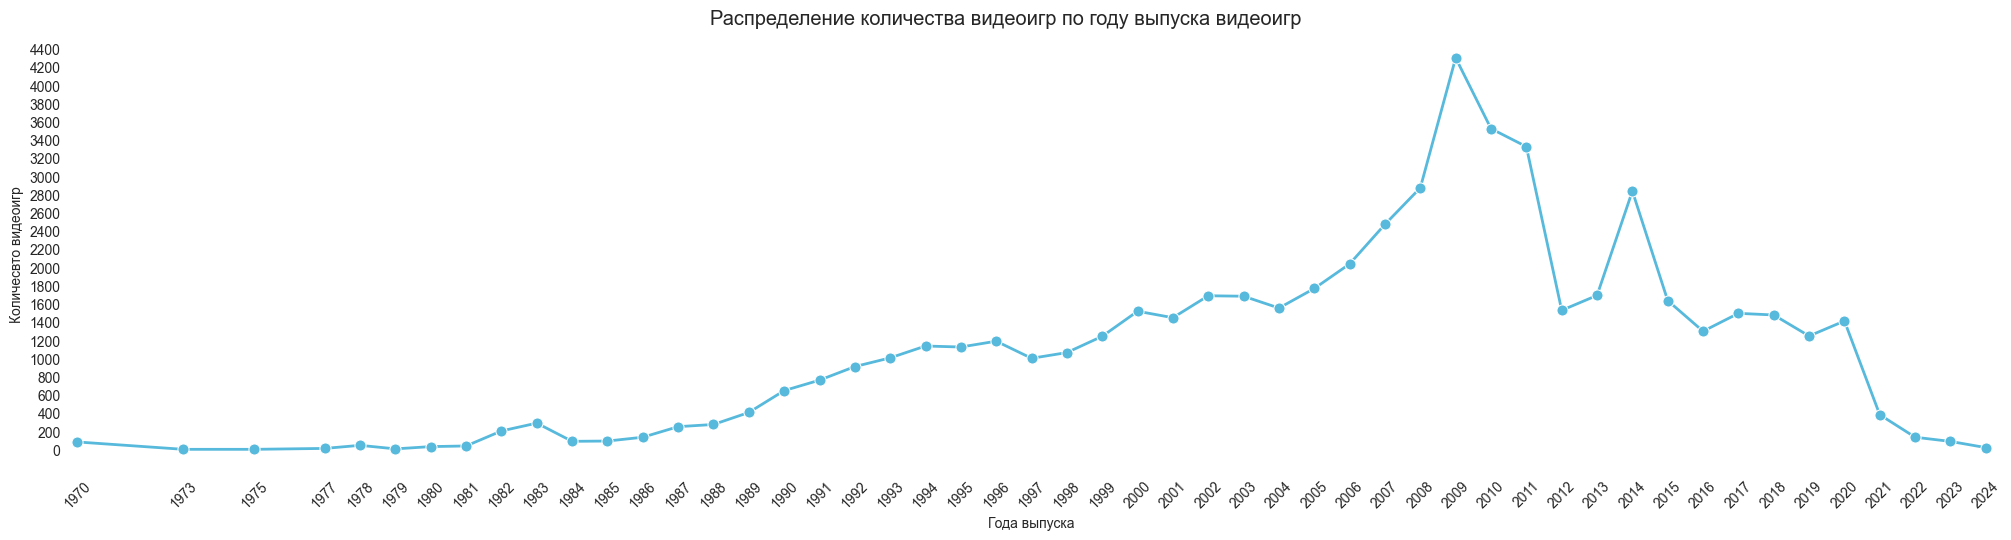

In [30]:
plot_data = (df.loc[df['date'].notna(), 'date']
             .dt
             .year
             .value_counts()
             .sort_index()
             .reset_index())

distribution(
    title=('Распределение количества видеоигр '
           'по году выпуска видеоигр'),
    ylabel='Количесвто видеоигр',
    data=plot_data,
    x='date',
    y='count'
)

Самая **первая видеоигра** была выпущена в **1970** году. **Резкий подъем** количества выпущенных видеоигр начинается в **1989** году и достигает свого **пика** в **2009** году (приблизительно **4300** видеоигр).

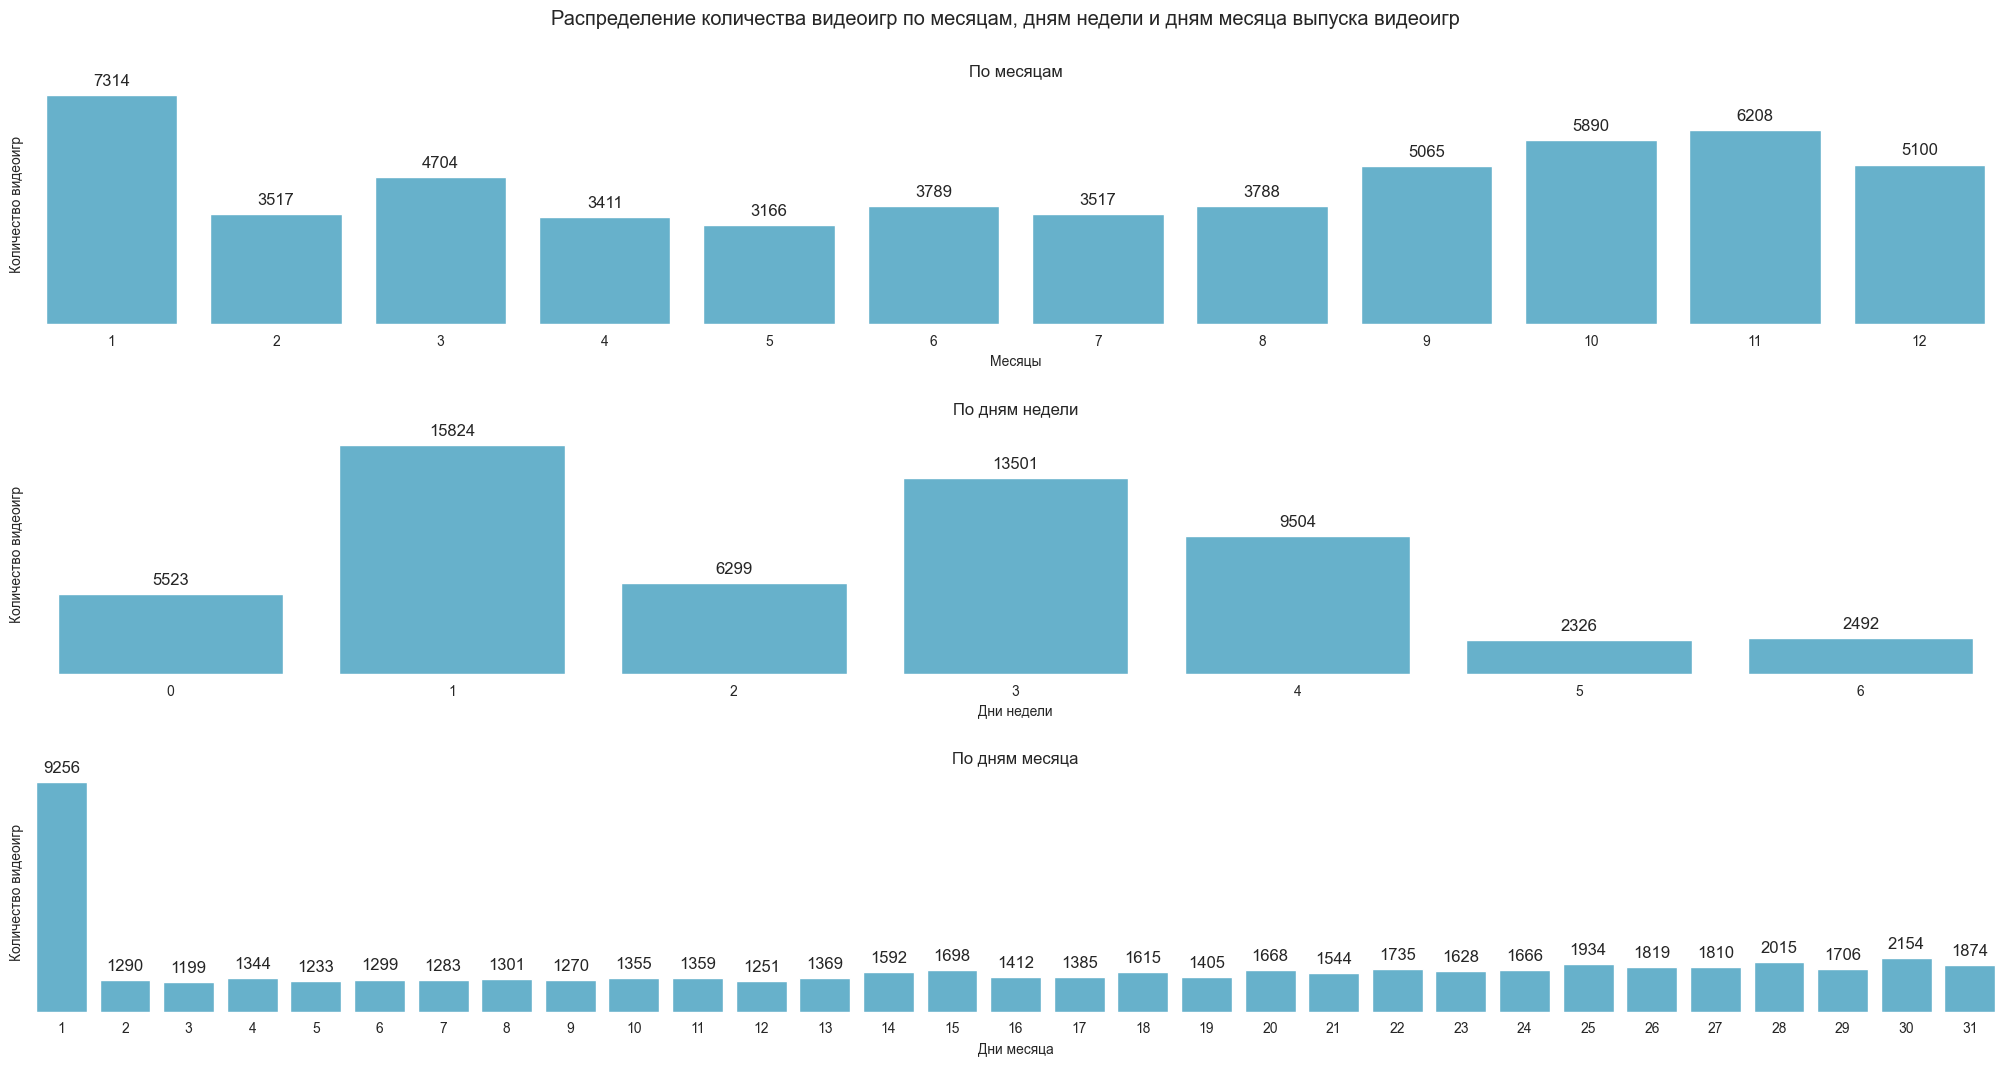

In [31]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 10)
)

figure.suptitle(
    t=('Распределение количества видеоигр '
       'по месяцам, дням недели и дням месяца выпуска видеоигр'), 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=3, 
    ncols=1, 
    hspace=0.1
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])
figure.add_subplot(grid[2, 0])

plot_data = (df.loc[df['date'].notna(), 'date']
             .dt.month
             .astype('int')
             .value_counts()
             .sort_index()
             .reset_index())

sns.barplot(
    data=plot_data,
    x='date', 
    y='count', 
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_title(
    label='По месяцам',
    y=1,
    fontsize='large'
)
figure.axes[0].set_xlabel('Месяцы')
figure.axes[0].set_ylabel('Количество видеоигр')
figure.axes[0].set_yticks([])
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
)

plot_data = (df.loc[df['date'].notna(), 'date']
             .dt.weekday
             .astype('int')
             .value_counts()
             .sort_index()
             .reset_index())

sns.barplot(
    data=plot_data,
    x='date', 
    y='count',
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[1].set_title(
    label='По дням недели',
    y=1.05,
    fontsize='large'
)
figure.axes[1].set_xlabel('Дни недели')
figure.axes[1].set_ylabel('Количество видеоигр')
figure.axes[1].set_yticks([])
figure.axes[1].bar_label(
    container=figure.axes[1].containers[0], 
    fontsize=12, 
    padding=5
)

plot_data = (df.loc[df['date'].notna(), 'date']
             .dt.day
             .astype('int')
             .value_counts()
             .sort_index()
             .reset_index())

sns.barplot(
    data=plot_data,
    x='date', 
    y='count',
    ax=figure.axes[2], 
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[2].set_title(
    label='По дням месяца',
    y=1,
    fontsize='large'
)
figure.axes[2].set_xlabel('Дни месяца')
figure.axes[2].set_ylabel('Количество видеоигр')
figure.axes[2].set_yticks([])
figure.axes[2].bar_label(
    container=figure.axes[2].containers[0], 
    fontsize=12, 
    padding=5
)

for ax in range(3):
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[ax].spines[s].set_visible(False)

Наибольшее количество видеоигр было выпущено в **январе**, **1** числа.

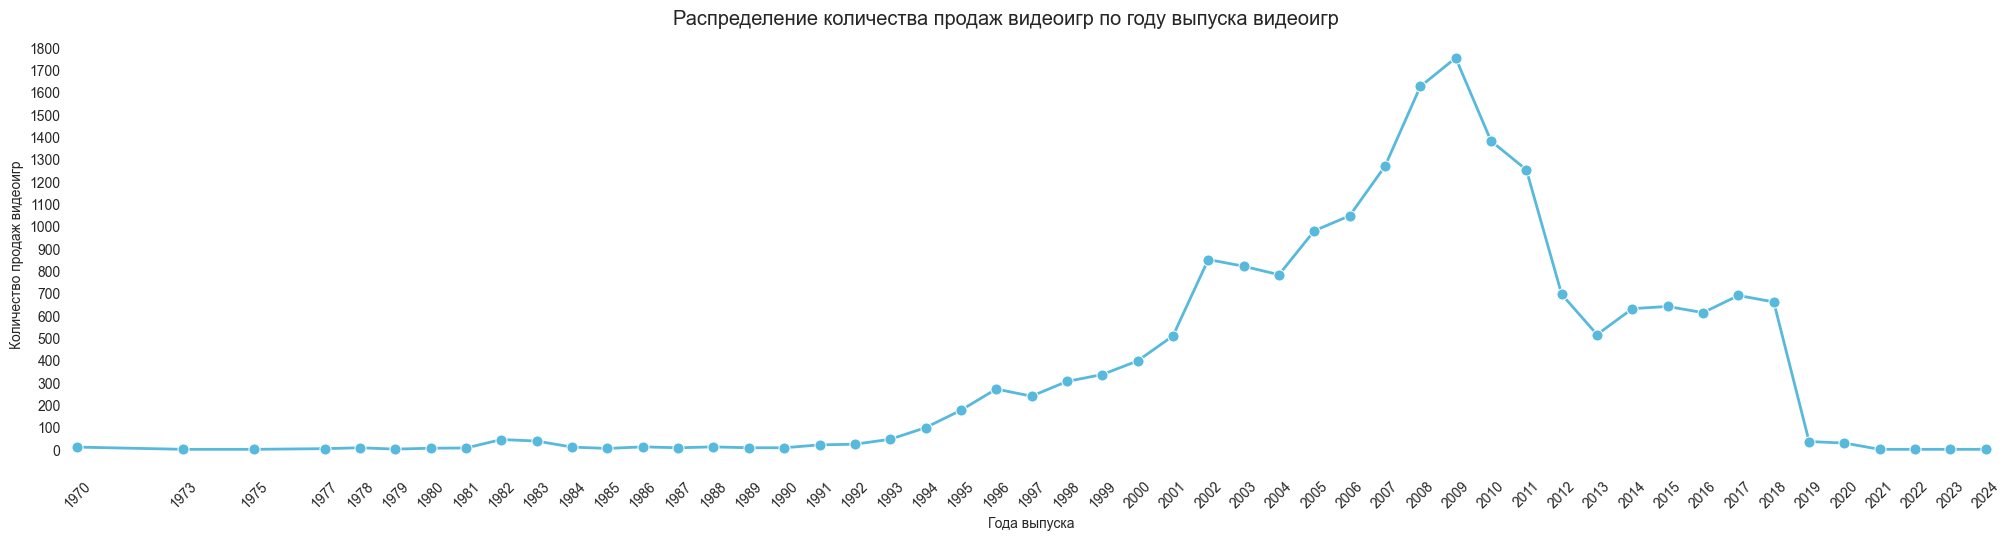

In [32]:
plot_data = (pd.DataFrame(
    data={
        'date': df.loc[df['date'].notna(), 'date'].dt.year,
        'value': df.loc[df['date'].notna(), 'total']
    }
)
             .groupby('date')
             .count()
             .reset_index())

distribution(
    title=('Распределение количества продаж видеоигр '
           'по году выпуска видеоигр'),
    ylabel='Количество продаж видеоигр',
    data=plot_data,
    x='date',
    y='value'
)

**Резкий подъем** количества продаж видеоигр начинается в **1994** году и достигает свого **пика** в **2009** году (приблизительно **1700** видеоигр).

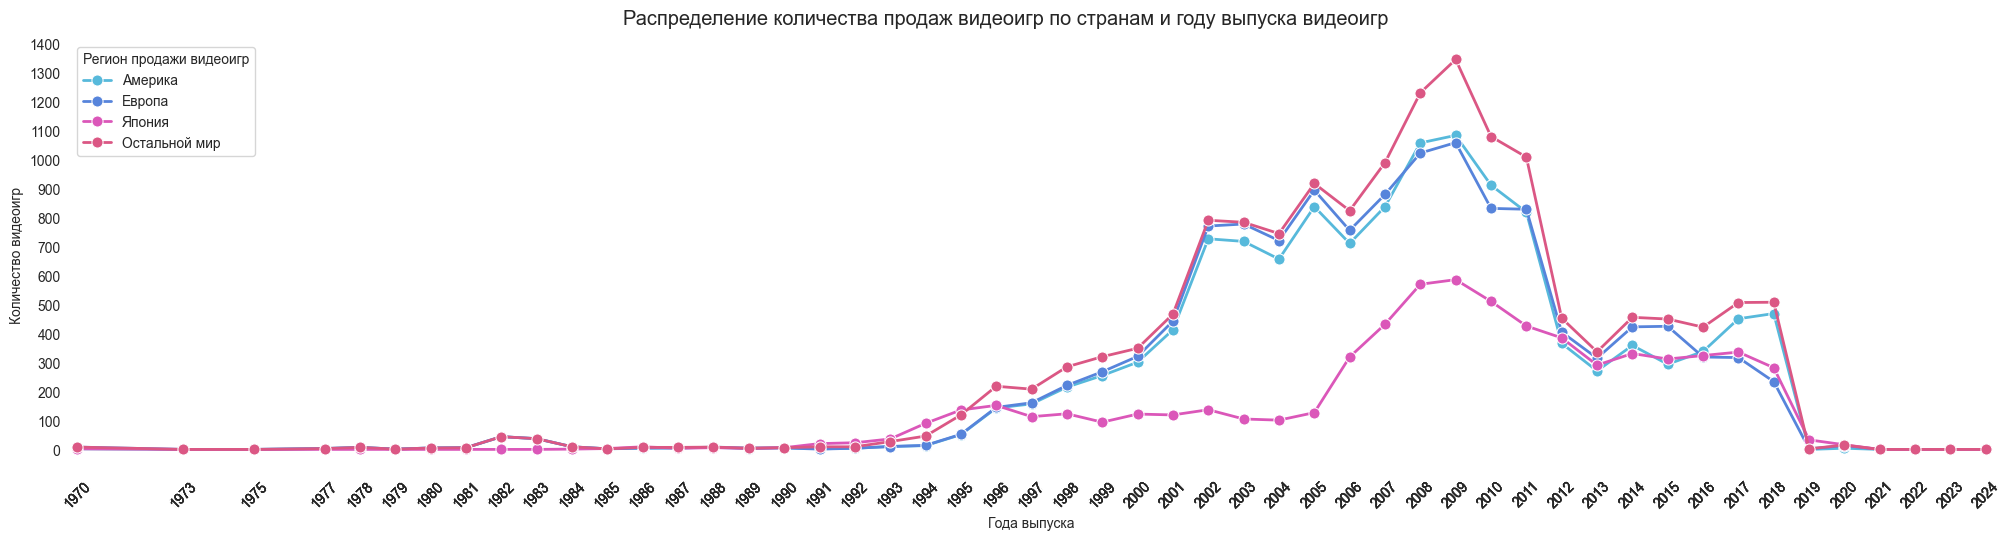

In [33]:
plot_data = (pd.DataFrame({'date': df.loc[df['date'].notna(), 'date'].dt.year})
             .join(df.loc[df['date'].notna(), ['america', 'europe', 'japan', 'other']])
             .rename(columns={
                 'america': 'Америка', 
                 'europe': 'Европа', 
                 'japan': 'Япония', 
                 'other': 'Остальной мир'
             })
             .groupby('date')
             .agg('count')
             .stack()
             .reset_index()
             .rename(columns={'level_1': 'country', 0: 'value'}))

distribution(
    title=('Распределение количества продаж видеоигр '
           'по странам и году выпуска видеоигр'),
    ylabel='Количество видеоигр',
    data=plot_data,
    x='date',
    y='value',
    hue='country'
)

Если рассматривать продажи видеоигр **по регионам** отдельно, то закономерность остается прежней, за исключением того, резкий подъем количества продаж в **Японии** начался в **2005** году, а для **остальных регионов** резкий пдъем аналогичен общему тренду - **1994** год. В **2009** году **Америка** и **Европа** достигли примерно одинакого количества продаж - **1000** видеоигр. В **Японии** продажи достигли приблизительно **500** видеоигр, а в остальном мире - около **1400** видеоигр.

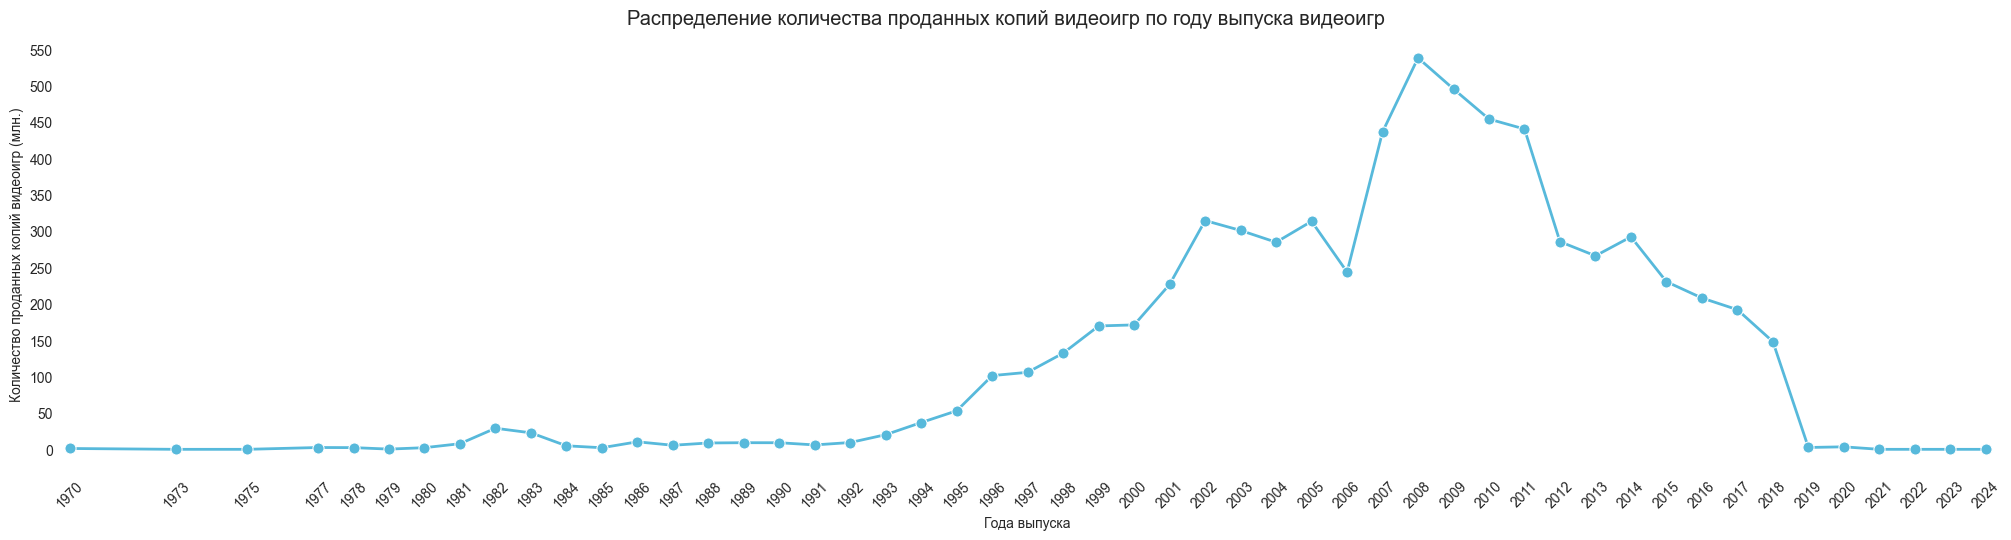

In [34]:
plot_data = (pd.DataFrame(
    data={
        'date': df.loc[df['date'].notna(), 'date'].dt.year,
        'value': df.loc[df['date'].notna(), 'total']
    }
)
             .groupby('date')
             .sum()
             .reset_index())

distribution(
    title=('Распределение количества проданных копий видеоигр '
           'по году выпуска видеоигр'),
    ylabel='Количество проданных копий видеоигр (млн.)',
    data=plot_data,
    x='date',
    y='value'
)

Графи количества проданных копий видеоигр **аналогичен** графику количеста продаж. **Резкий подъем** количества проданных копий видеоигр начинается в **1994** году и достигает свого **пика** в **2008** году (приблизительно **550 млн.** копий видеоигр).

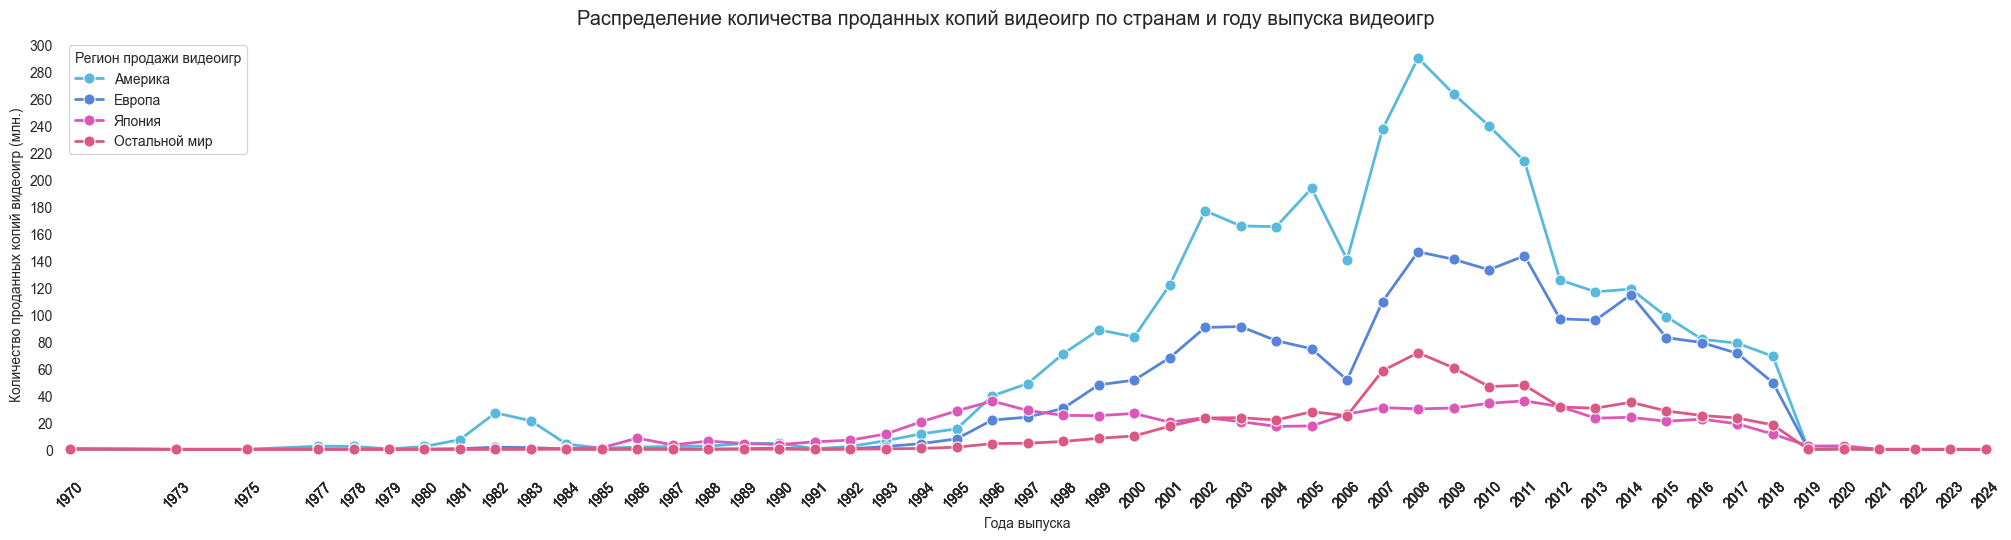

In [35]:
plot_data = (pd.DataFrame({'date': df.loc[df['date'].notna(), 'date'].dt.year})
             .join(df.loc[df['date'].notna(), ['america', 'europe', 'japan', 'other']])
             .rename(columns={
                 'america': 'Америка', 
                 'europe': 'Европа', 
                 'japan': 'Япония', 
                 'other': 'Остальной мир'
             })
             .groupby('date')
             .agg('sum')
             .stack()
             .reset_index()
             .rename(columns={'level_1': 'country', 0: 'value'}))

distribution(
    title=('Распределение количества проданных копий видеоигр '
           'по странам и году выпуска видеоигр'),
    ylabel='Количество проданных копий видеоигр (млн.)',
    data=plot_data,
    x='date',
    y='value',
    hue='country'
)

Если рассматривать продажи видеоигр **по регионам** отдельно, то закономерность остается прежней, за исключением того, резкий подъем количества проданных копий видеоигр в **Японии** и **остальных регионах** отсутствует. В **2008** году **Америка** и **Европа** достигли приблизительно **280 млн.** и **160 млн.** проданных копий видеоигр соответственно. **Япония** и **остальные регионы** приблизительно **60 млн.** и **25 млн.** соответственно.

## Анализ числовых данных

In [36]:
(df.select_dtypes(['float32', 'int32'])
 .describe(percentiles=np.linspace(0.1, 0.9, 9))
 .style
 .format(lambda x: f'{x:.2f}'))

,shipped,total,america,europe,japan,other,vgc,critic,user
count,2903.00,18919.00,12637.00,12824.00,6723.00,15128.00,2285.00,6624.00,413.00
mean,1.75,0.35,0.26,0.15,0.10,0.04,7.09,7.21,8.05
std,4.15,0.81,0.49,0.39,0.17,0.13,1.55,1.46,1.67
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
10%,0.11,0.01,0.02,0.00,0.01,0.00,5.00,5.20,6.00
20%,0.15,0.02,0.04,0.01,0.01,0.00,6.00,6.10,7.00
30%,0.20,0.05,0.06,0.01,0.02,0.00,6.50,6.70,7.86
40%,0.30,0.08,0.09,0.02,0.03,0.01,7.00,7.00,8.00
50%,0.50,0.12,0.12,0.04,0.04,0.01,7.30,7.50,8.50
60%,1.00,0.18,0.16,0.06,0.06,0.02,7.80,7.80,8.90


Более **90%** видеоигр имеют:
- **количество оданных копий** - менее  **3.9 млн.**;
- **общее количество** проданных копий - менее **0.8 млн.**;
- количество проданных копий в **Америке** - менее **0.6 млн.**;
- количество проданных копий в **Европе** - менее **0.35 млн.**;
- количество проданных копий в **Японии** - менее **0.25 млн.**;
- количество проданных копий в **остальных регионах** - менее **0.1 млн.**;
- рейтинг сайта VGC - **8.8**;
- рейтинг критиков - **8.9**;
- рейтинг пользователей- **8.6**.

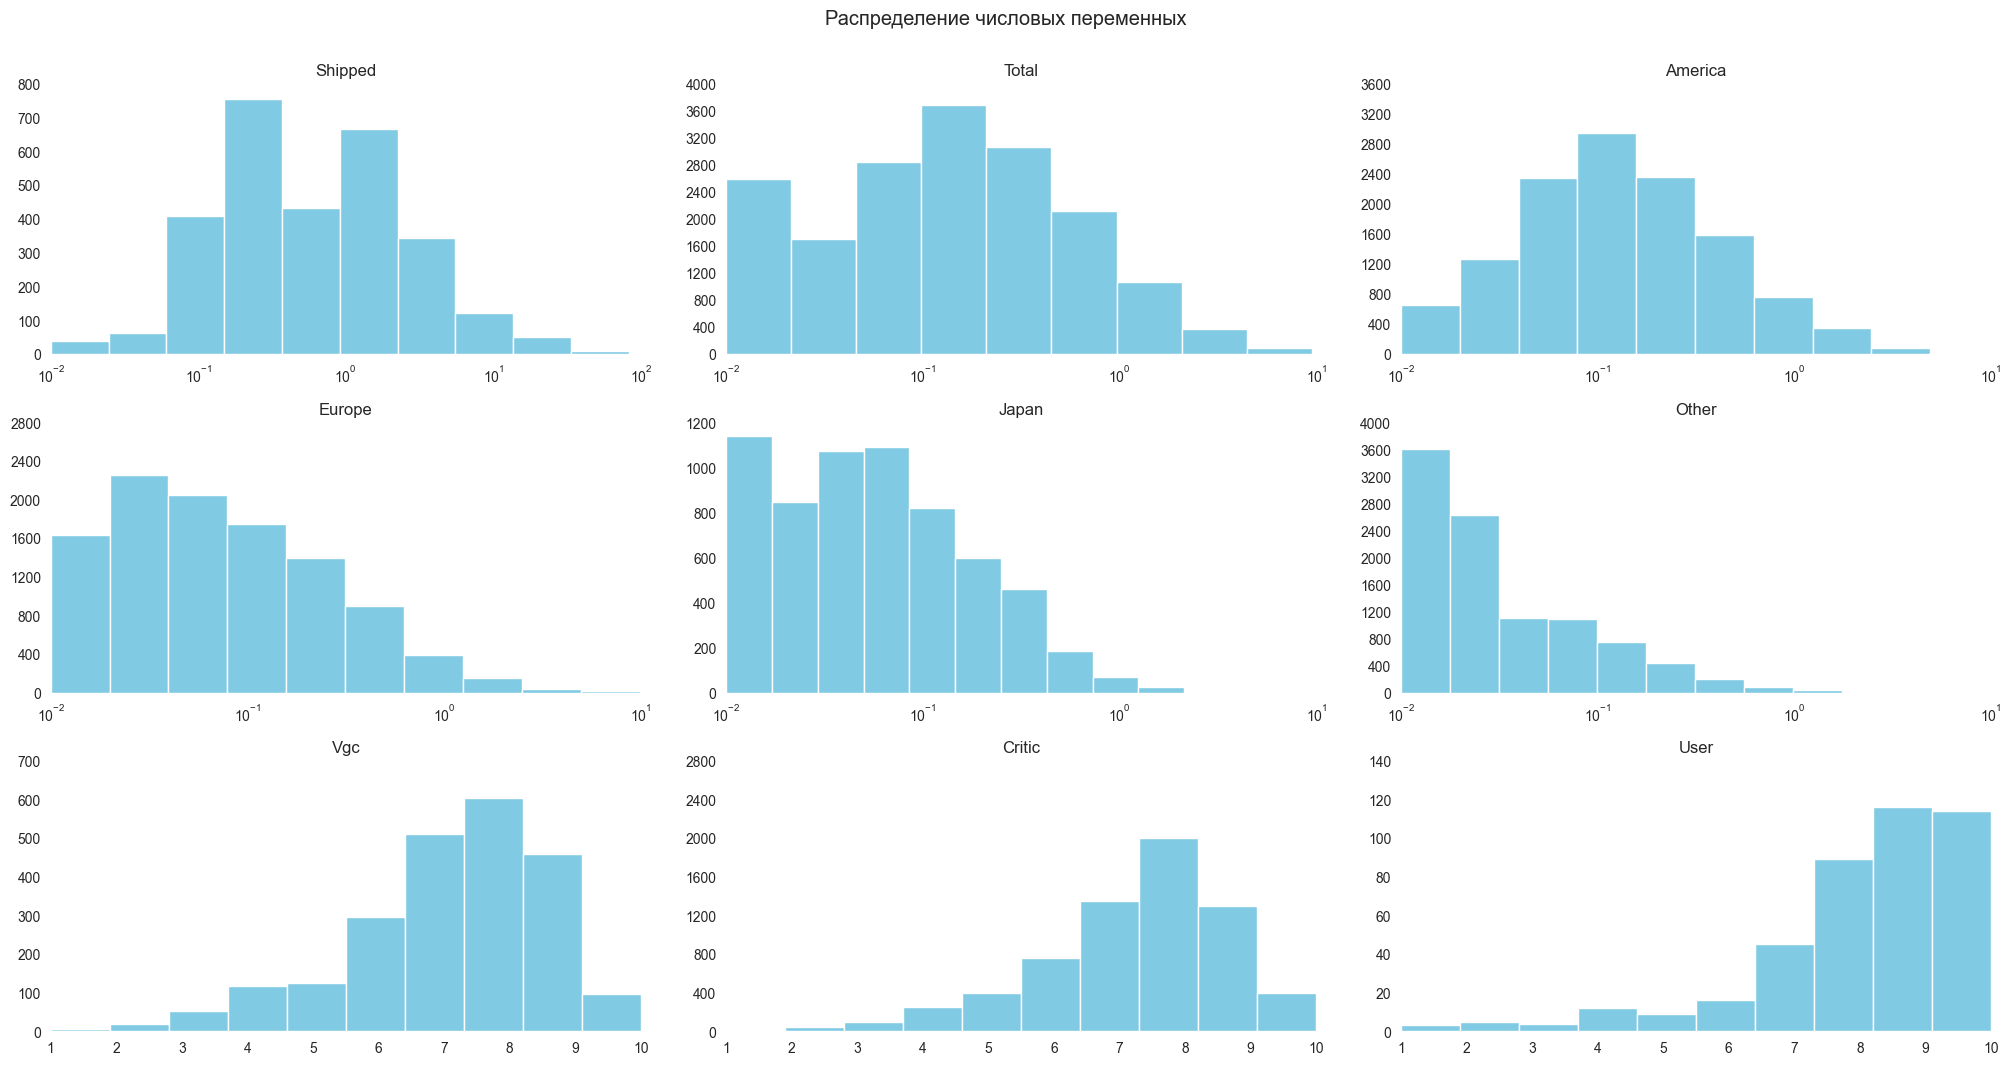

In [37]:
figure = plt.figure(
    layout="constrained", 
    figsize=(20, 10)
)

figure.suptitle(
    t='Распределение числовых переменных',
    y=1.05,
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure, 
    nrows=3, 
    ncols=3,  
    hspace=0.05, 
    wspace=0.05
)

for i in range(3):
    for j in range(3):
        figure.add_subplot(grid[i, j])

columns = df.select_dtypes(['float32', 'int32']).columns

for i, column in enumerate(columns):   
    sns.histplot(
        x=df[column], 
        ax=figure.axes[i], 
        bins=10,
        log_scale=True if i < 6 else False,
        color=sns.color_palette('hls', 15)[8]
    )
        
    figure.axes[i].set_title(
        label=column.capitalize(),
        y=1,
        fontsize='large'
    )
    figure.axes[i].set_xlabel('')
    figure.axes[i].set_ylabel('')
    s, maximum = step(figure.axes[i].get_yticks().max() - 1, 2)
    figure.axes[i].set_yticks(np.arange(0, maximum + 1, s))
    if i == 0:
        figure.axes[i].set_xticks([10**x for x in range(-2, 3)])
        figure.axes[i].set_xbound(10**-2, 10**2)
    elif i < 6:
        figure.axes[i].set_xticks([10**x for x in range(-2, 2)])
        figure.axes[i].set_xbound(10**-2, 10**1)
    else:
        figure.axes[i].set_xticks(range(1, 11))
        figure.axes[i].set_xbound(1, 10)

    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[i].spines[s].set_visible(False)

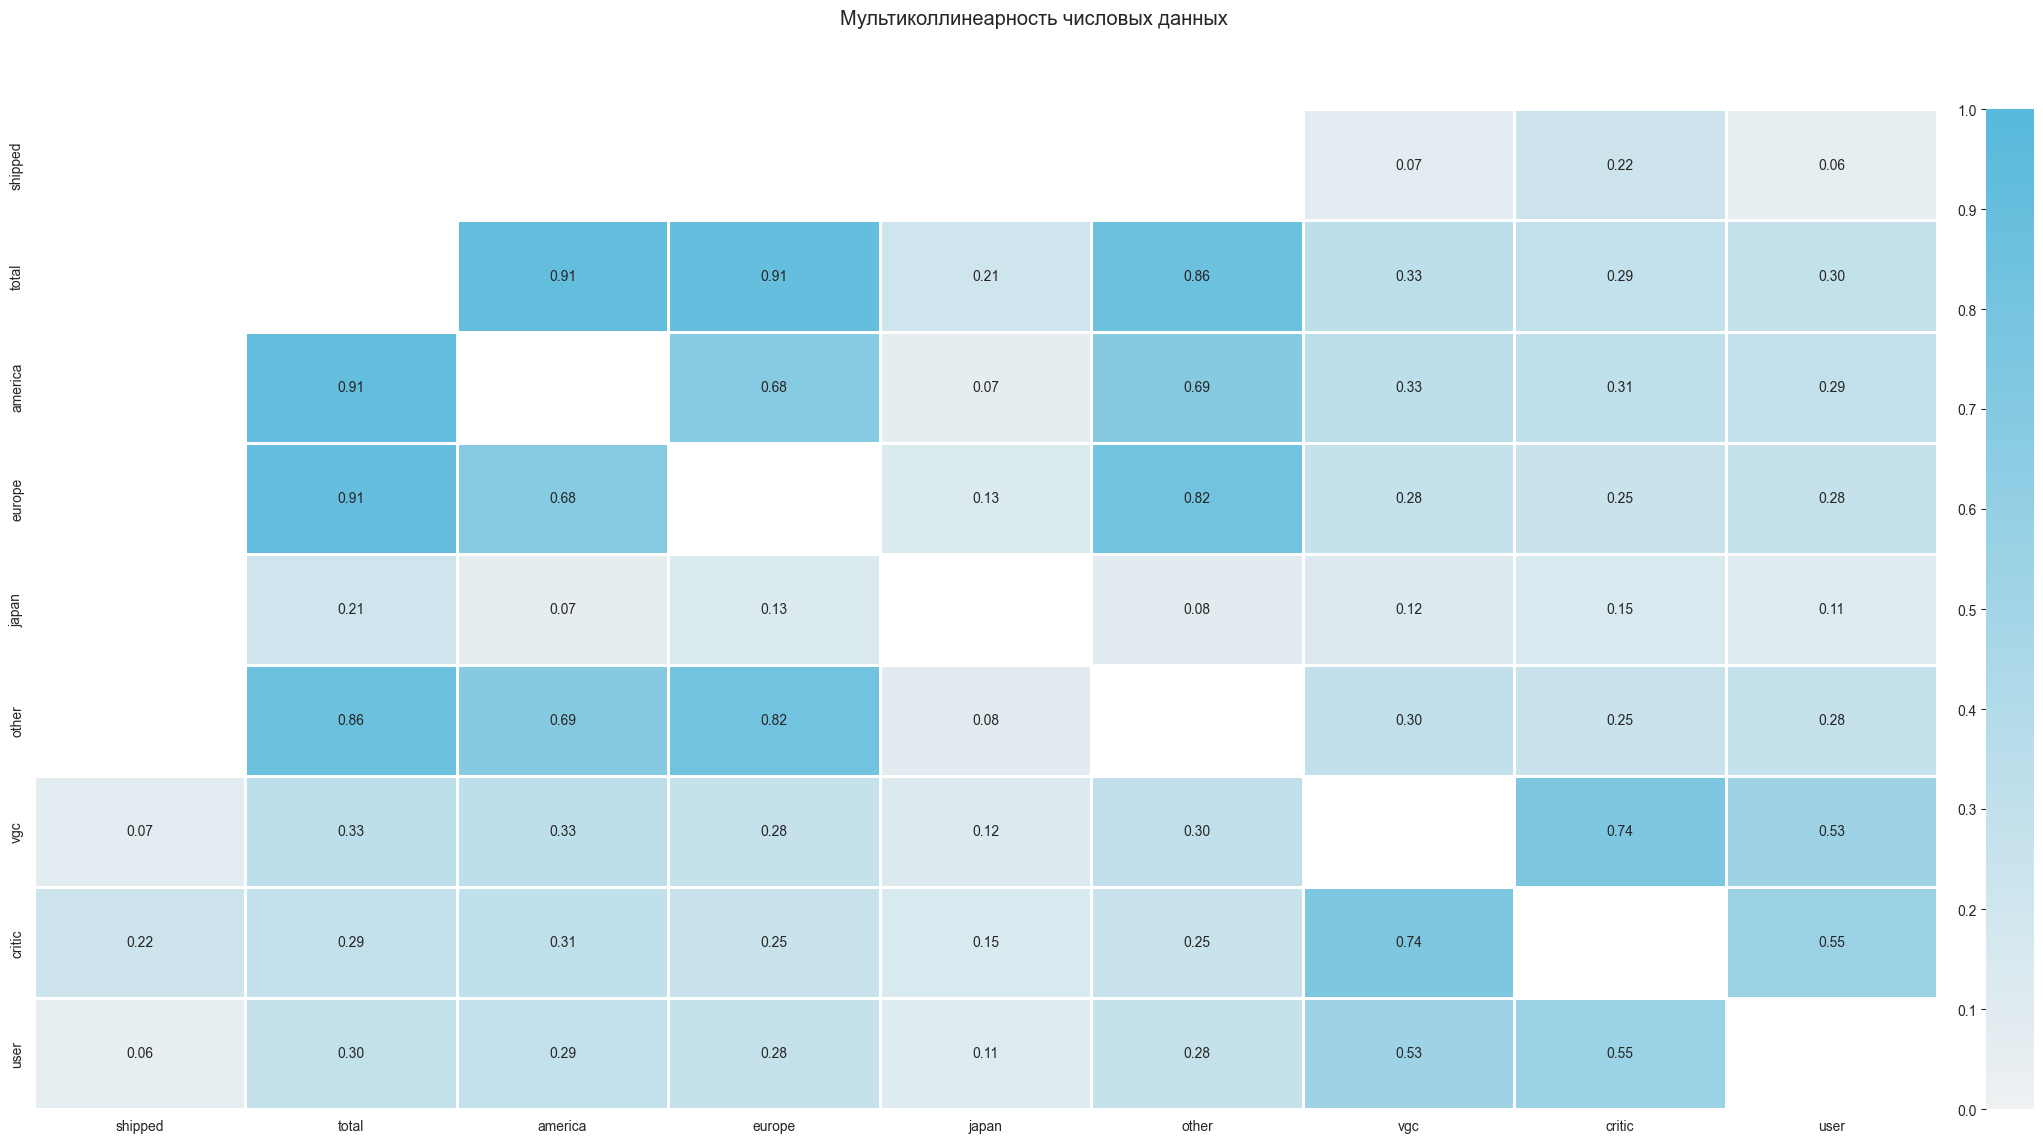

In [38]:
figure = plt.figure(
    figsize=(20, 10)
)

figure.suptitle(
    t='Мультиколлинеарность числовых данных', 
    y=1.1, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=1,
    ncols=2,
    wspace=0.05,
    left=0,
    right=1,
    top=1,
    bottom=0,
    width_ratios=[1, 0.025]
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

plot_data = df.select_dtypes(['float32', 'int32']).corr()

sns.heatmap(
    data=plot_data,
    ax=figure.axes[0],
    annot=True,
    linewidths=1.0,
    fmt='.2f',
    mask = plot_data == 1,
    cmap=sns.color_palette("light:#57b9db", as_cmap=True),
    cbar_ax=figure.axes[1],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.0,
    vmax=1.0
)

figure.axes[1].set_yticks(np.linspace(0.0, 1.0, 11));

Наибольшей зависимостью обладают (коэфициент корреляции Пирсона - более 0.85) - **общее** количество проданных копий и количество проданных копий в **Америке**, **общее** количество проданных копий и количество проданных копий в **Европе**, **общее** количество проданных копий и количество проданных копий в **отсальном мире** 

### Анализ общего количества продаж видеоигр

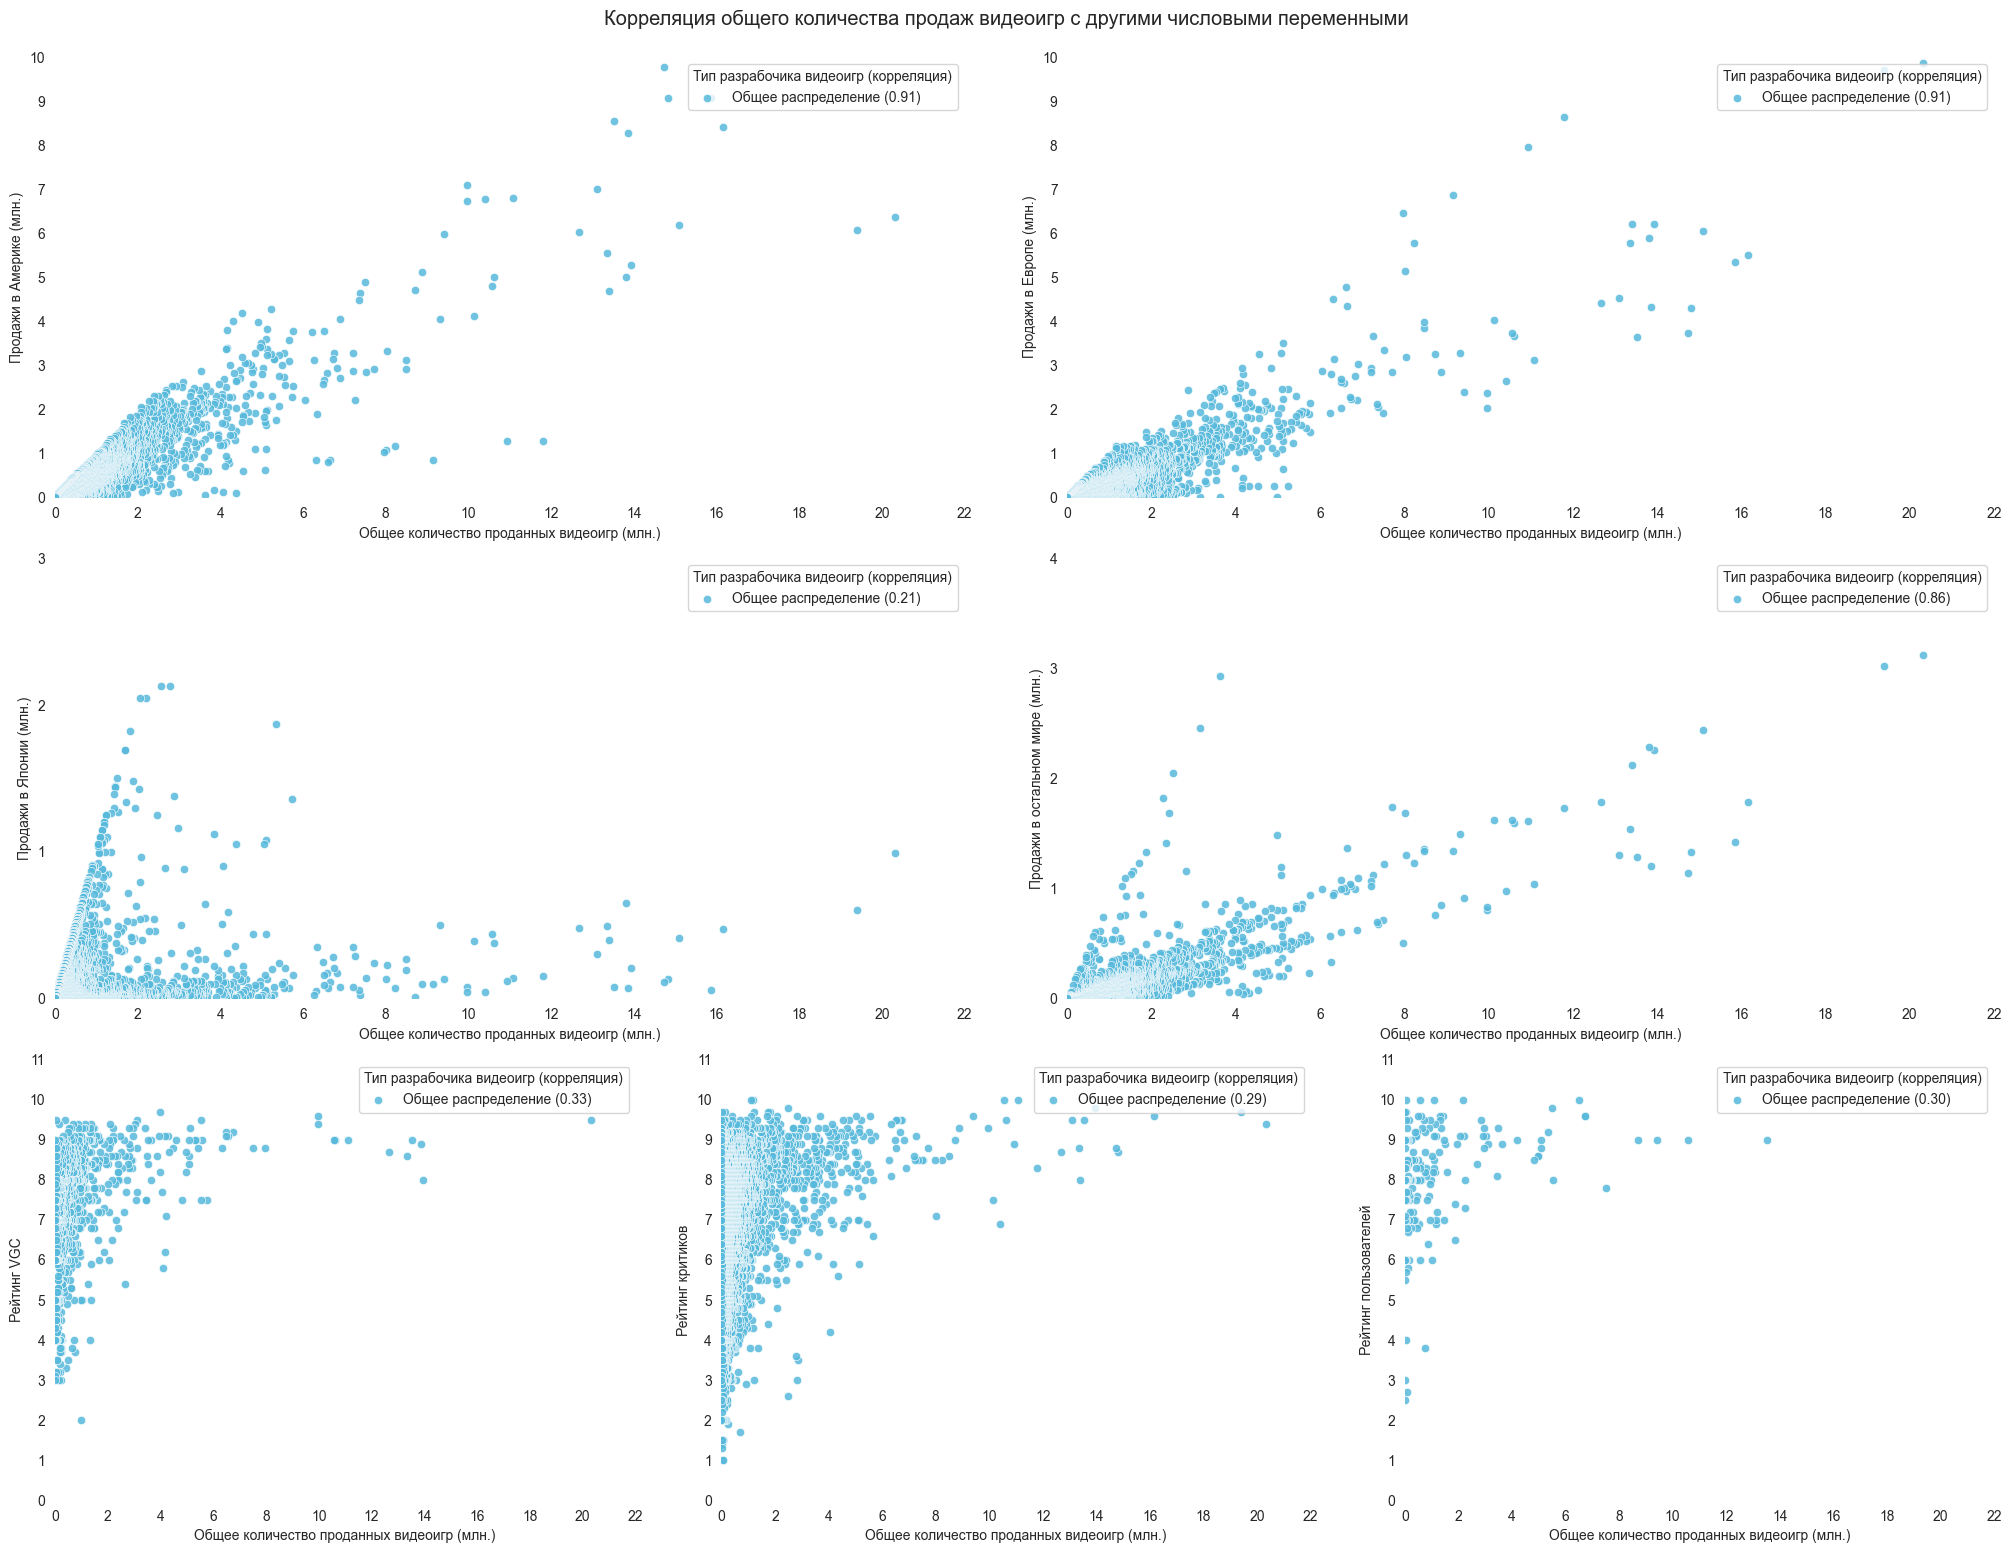

In [61]:
figure = plt.figure(
    layout="constrained", 
    figsize=(20, 15)
)

figure.suptitle(
    t='Корреляция общего количества продаж видеоигр с другими числовыми переменными',
    y=1.025,
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure, 
    nrows=3, 
    ncols=6,  
    hspace=0.025, 
    wspace=0.025
)

figure.add_subplot(grid[0, :3])
figure.add_subplot(grid[0, 3:])
figure.add_subplot(grid[1, :3])
figure.add_subplot(grid[1, 3:])
figure.add_subplot(grid[2, :2])
figure.add_subplot(grid[2, 2:4])
figure.add_subplot(grid[2, 4:])

columns = df.select_dtypes(['float32', 'int32']).columns[2:]

for i, column in zip(np.arange(0, 7), columns):
    plot_data = df[['total', column]]

    sns.scatterplot(
        data=plot_data,
        x='total',
        y=column,
        alpha=0.85,
        sizes=8,
        ax=figure.axes[i],
        color=sns.color_palette('hls', 15)[8]
    )
  
    figure.axes[i].set_xlabel('Общее количество проданных видеоигр (млн.)')
    figure.axes[i].set_ylabel(
        {
            0: 'Продажи в Америке (млн.)',
            1: 'Продажи в Европе (млн.)',
            2: 'Продажи в Японии (млн.)',
            3: 'Продажи в остальном мире (млн.)',
            4: 'Рейтинг VGC',
            5: 'Рейтинг критиков',
            6: 'Рейтинг пользователей',
        }[i])
    s, maximum = step(plot_data['total'].max())
    figure.axes[i].set_xticks(np.arange(0, maximum + 1, s))
    figure.axes[i].set_xbound((0.0, maximum))
    s, maximum = step(plot_data[column].max())
    figure.axes[i].set_yticks(np.arange(0, maximum + 1, s))
    figure.axes[i].set_ybound((0.0, maximum))
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[i].spines[s].set_visible(False)
    pirson = plot_data['total'].corr(plot_data[column])
    figure.axes[i].legend(
        title='Тип разрабочика видеоигр (корреляция)',
        labels=[f'Общее распределение ({pirson:.2f})'],
        loc='upper right', 
        alignment='left'
    )

**Наибольшая зависимость** общего количества проданных копий видеоигр наблюдается от количества проданных копий в **Америке** (коэффициент корреляции Пиросна **более 0.90**), количества проданных копий в **Европе** (коэффициент корреляции Пиросна **более 0.90**) и количества проданных копий в **остальных регионах** (коэффициент корреляции Пиросна **более 0.85**). **Наименьшая зависимость** наблюдается от от количества проданных копий в **Японии** (коэффициент корреляции Пиросна **менее 0.25**).

Посмотрим, как распределено общее количество проданных копий видеоигр по топ-10 игровым платформам по количеству выпущенных видеоигр.

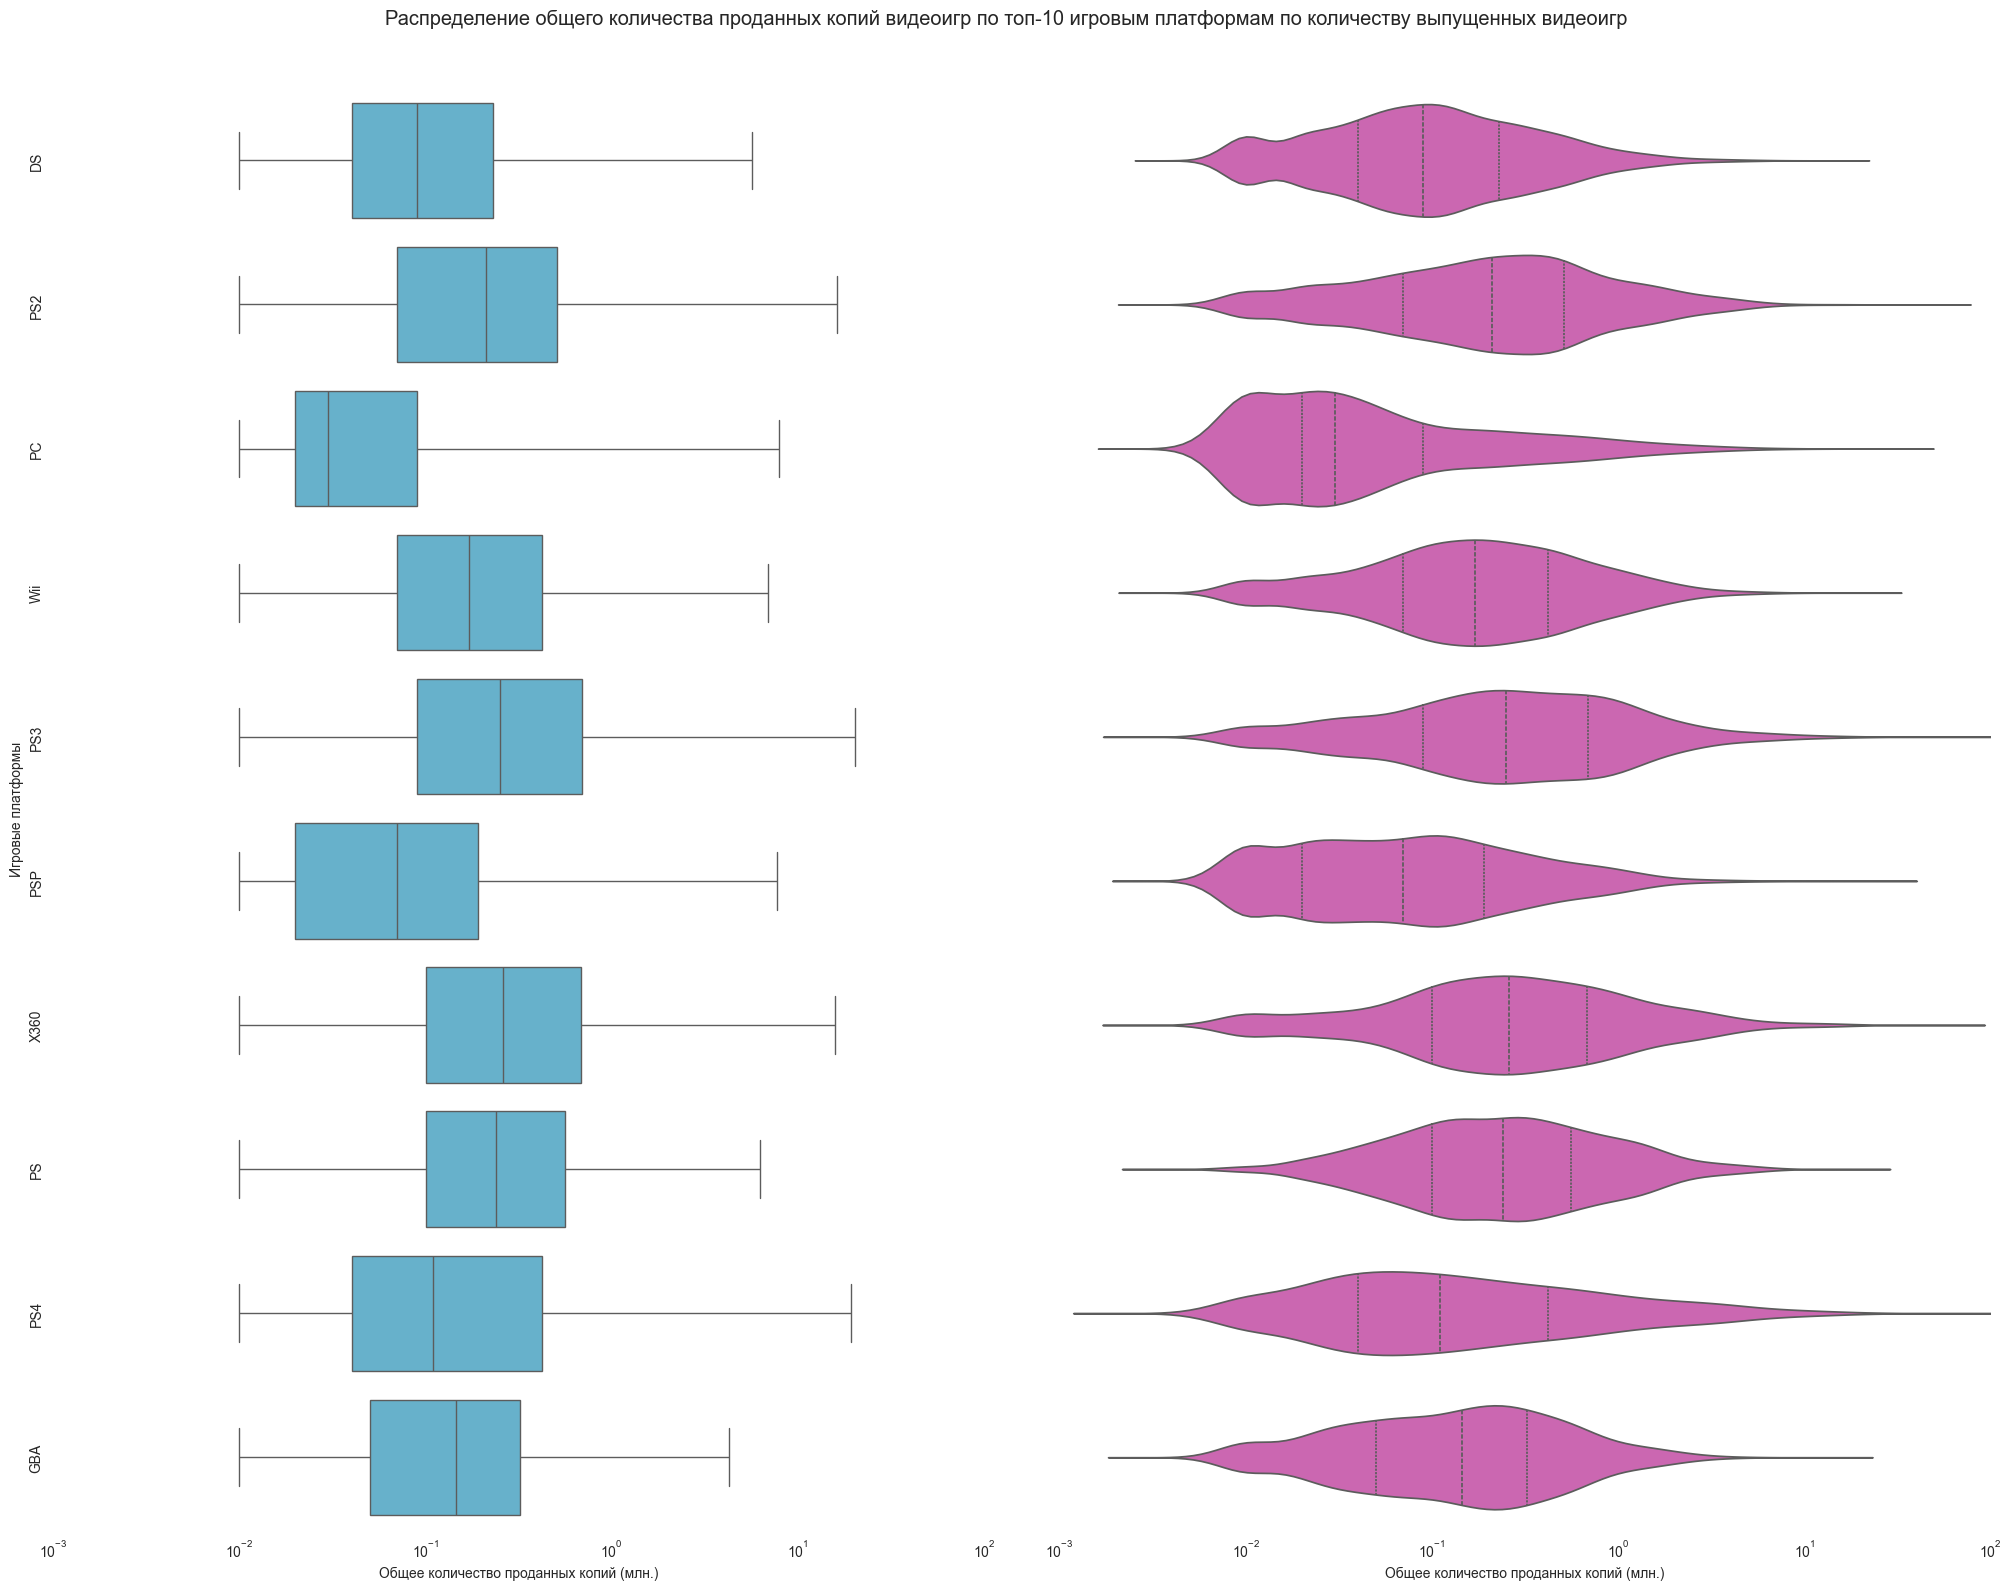

In [40]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 15)
)

figure.suptitle(
    t=('Распределение общего количества проданных копий видеоигр '
       'по топ-10 игровым платформам по количеству выпущенных видеоигр'), 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=1, 
    ncols=2, 
    wspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

platforms = (df
             .loc[df['total'].notna(), 'platform']
             .value_counts()
             .iloc[:10])
columns = ['total', 'platform']
plot_data = (df
             .loc[(df['platform'].isin(platforms.index)) & (df['total'].notna()) & (df['total'] > 0), columns]
             .reset_index(drop=True)
             .sort_values(
                 by='platform',
                 key=lambda x: platforms.rank()[x], 
                 ascending=False
                 )) 
sns.boxplot(
    data=plot_data,
    x='total',
    y='platform',
    log_scale=True,
    whis=(0, 100),
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

sns.violinplot(
    data=plot_data,
    x='total',
    y='platform',
    inner="quart",
    log_scale=True,
    bw_adjust=1.0,
    cut=5.0,
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[13]
)

for i in range(2):
    figure.axes[i].set_xlabel('Общее количество проданных копий (млн.)')
    figure.axes[i].set_ylabel('Игровые платформы' if not i else '')
    figure.axes[i].set_xbound((10 ** -3, 10 ** 2))
    figure.axes[i].set_xticks([10 ** x for x in range(-3, 3)])
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[i].spines[s].set_visible(False)

figure.axes[0].set_yticks(
    ticks=np.arange(10), 
    labels=platforms.index.map(str),
    rotation=90,
    verticalalignment='center'
)
figure.axes[1].set_yticklabels([]);

На диаграммах видно, что общее количество проданных копий видеоигр среди топ-10 **игровых платформ** по количеству выпущенных видеоигр распределено **неравномерно**.

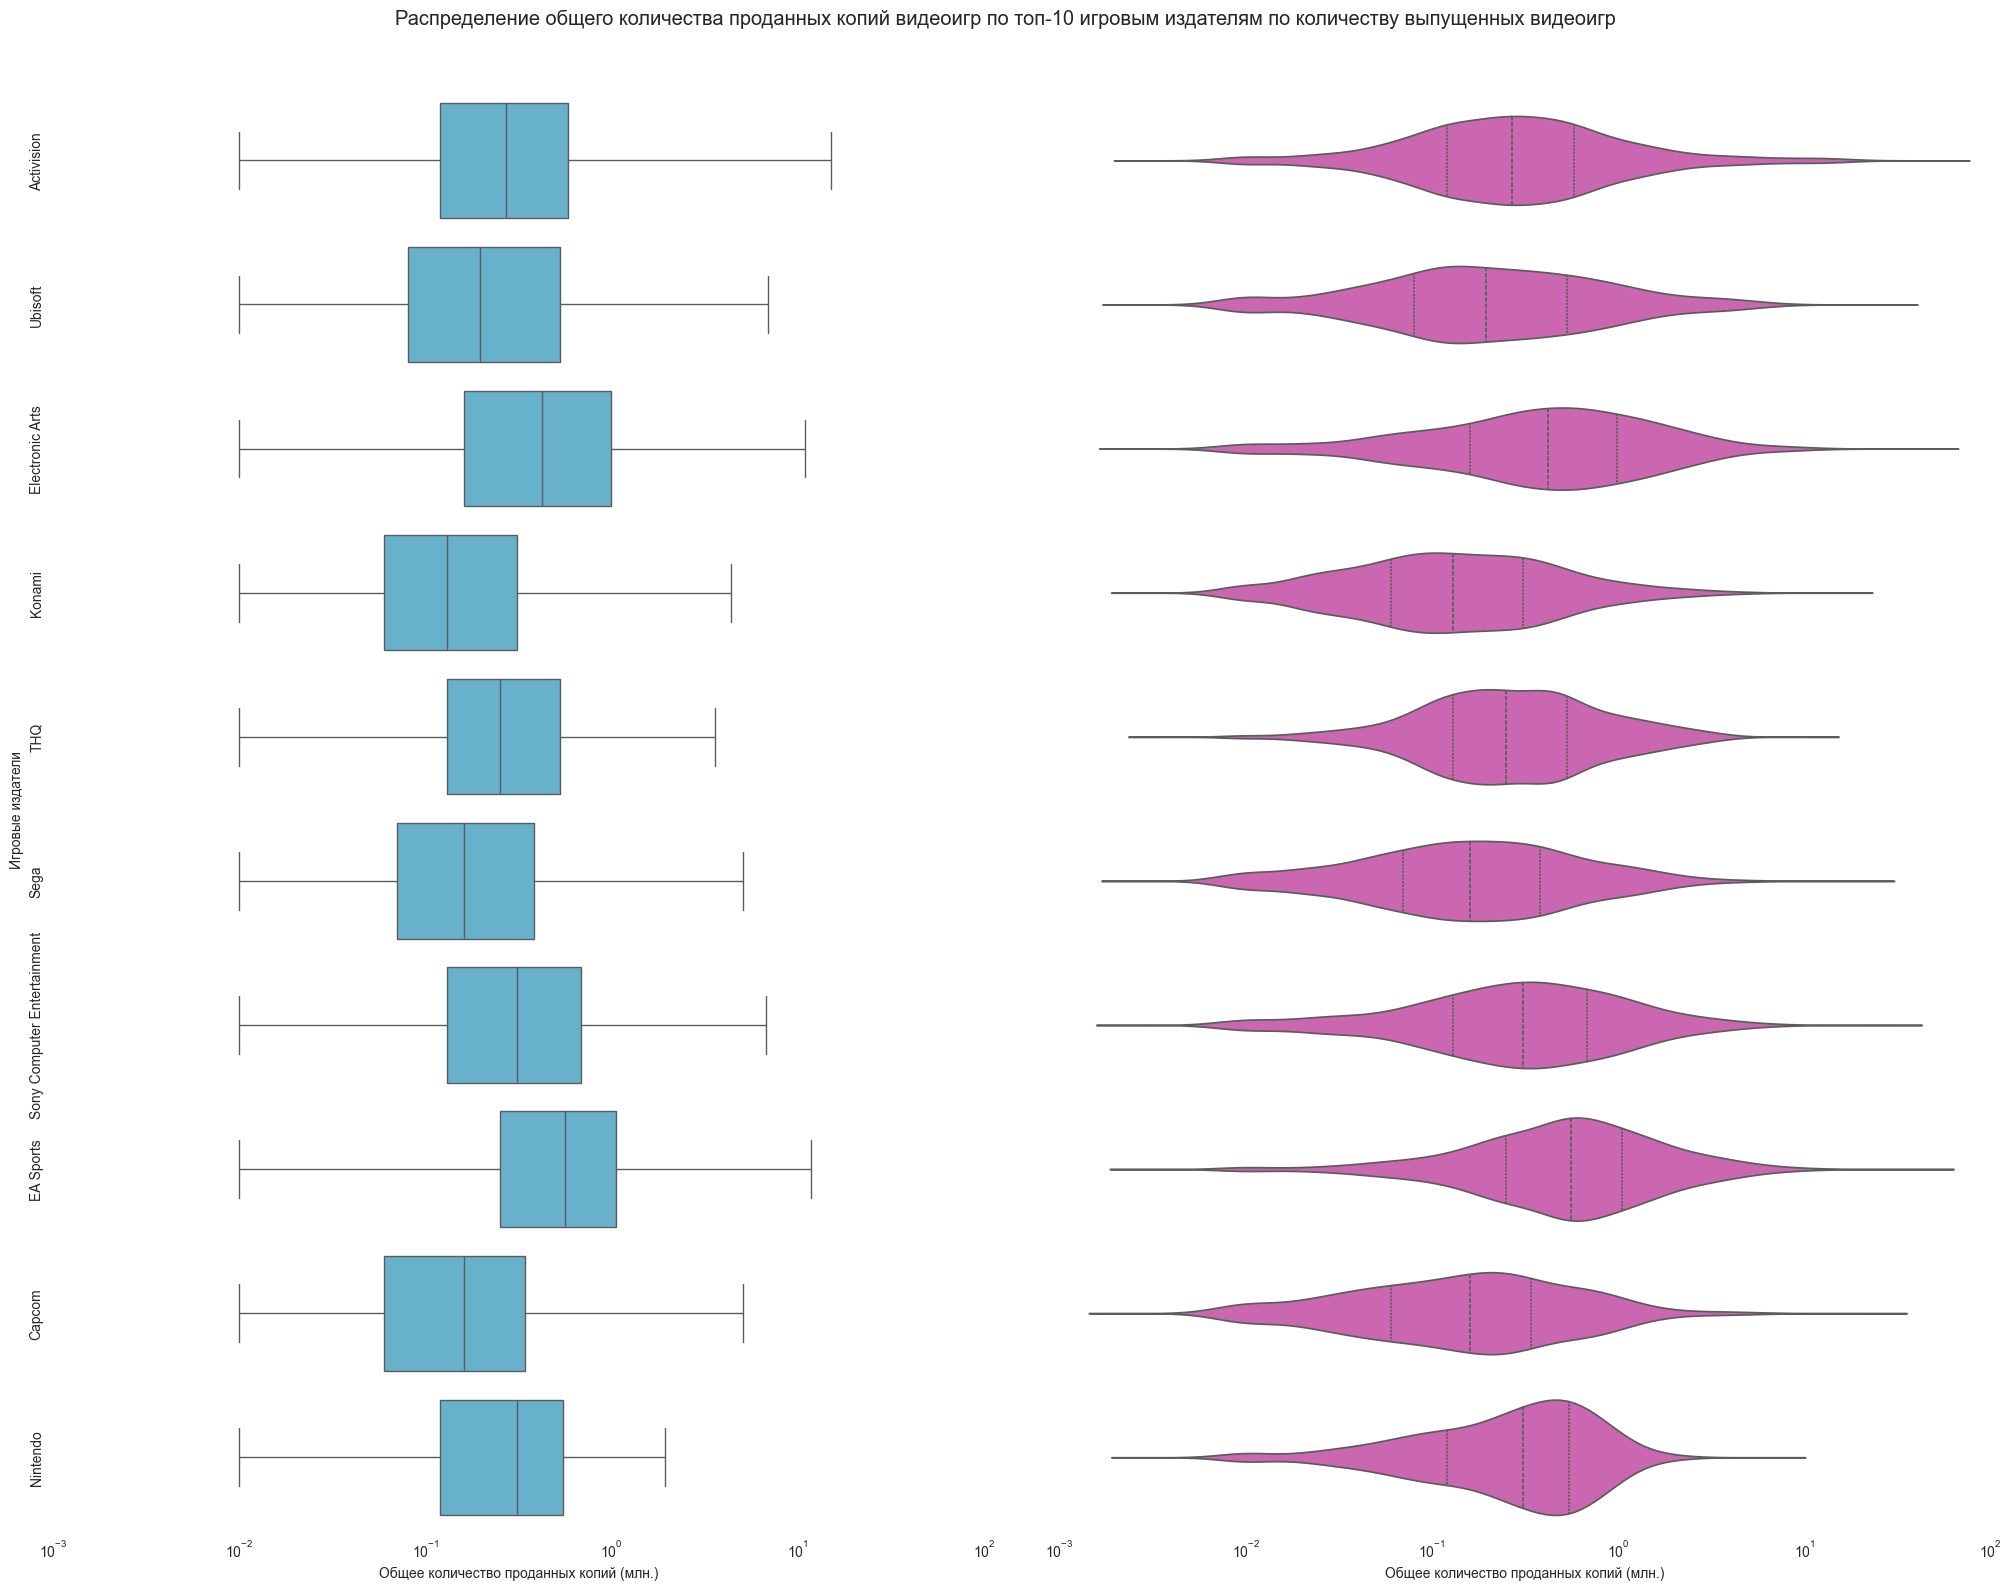

In [41]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 15)
)

figure.suptitle(
    t=('Распределение общего количества проданных копий видеоигр '
       'по топ-10 игровым издателям по количеству выпущенных видеоигр'), 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=1, 
    ncols=2, 
    wspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

publishers = (df
              .loc[df['total'].notna(), 'publisher']
              .value_counts()
              .iloc[:10])
columns = ['total', 'publisher']
plot_data = (df
             .loc[(df['publisher'].isin(publishers.index)) & (df['total'].notna()) & (df['total'] > 0), columns]
             .reset_index(drop=True)
             .sort_values(
                 by='publisher',
                 key=lambda x: publishers.rank()[x], 
                 ascending=False
                 )) 
sns.boxplot(
    data=plot_data,
    x='total',
    y='publisher',
    log_scale=True,
    whis=(0, 100),
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

sns.violinplot(
    data=plot_data,
    x='total',
    y='publisher',
    inner="quart",
    log_scale=True,
    bw_adjust=1.0,
    cut=5.0,
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[13]
)

for i in range(2):
    figure.axes[i].set_xlabel('Общее количество проданных копий (млн.)')
    figure.axes[i].set_ylabel('Игровые издатели' if not i else '')
    figure.axes[i].set_xbound((10 ** -3, 10 ** 2))
    figure.axes[i].set_xticks([10 ** x for x in range(-3, 3)])
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[i].spines[s].set_visible(False)   

figure.axes[0].set_yticks(
    ticks=np.arange(10), 
    labels=publishers.index.map(str),
    rotation=90,
    verticalalignment='center'
)
figure.axes[1].set_yticklabels([]);

На диаграммах видно, что общее количество проданных копий видеоигр среди топ-10 **игровых издаелей** по количеству выпущенных видеоигр распределено **неравномерно**.

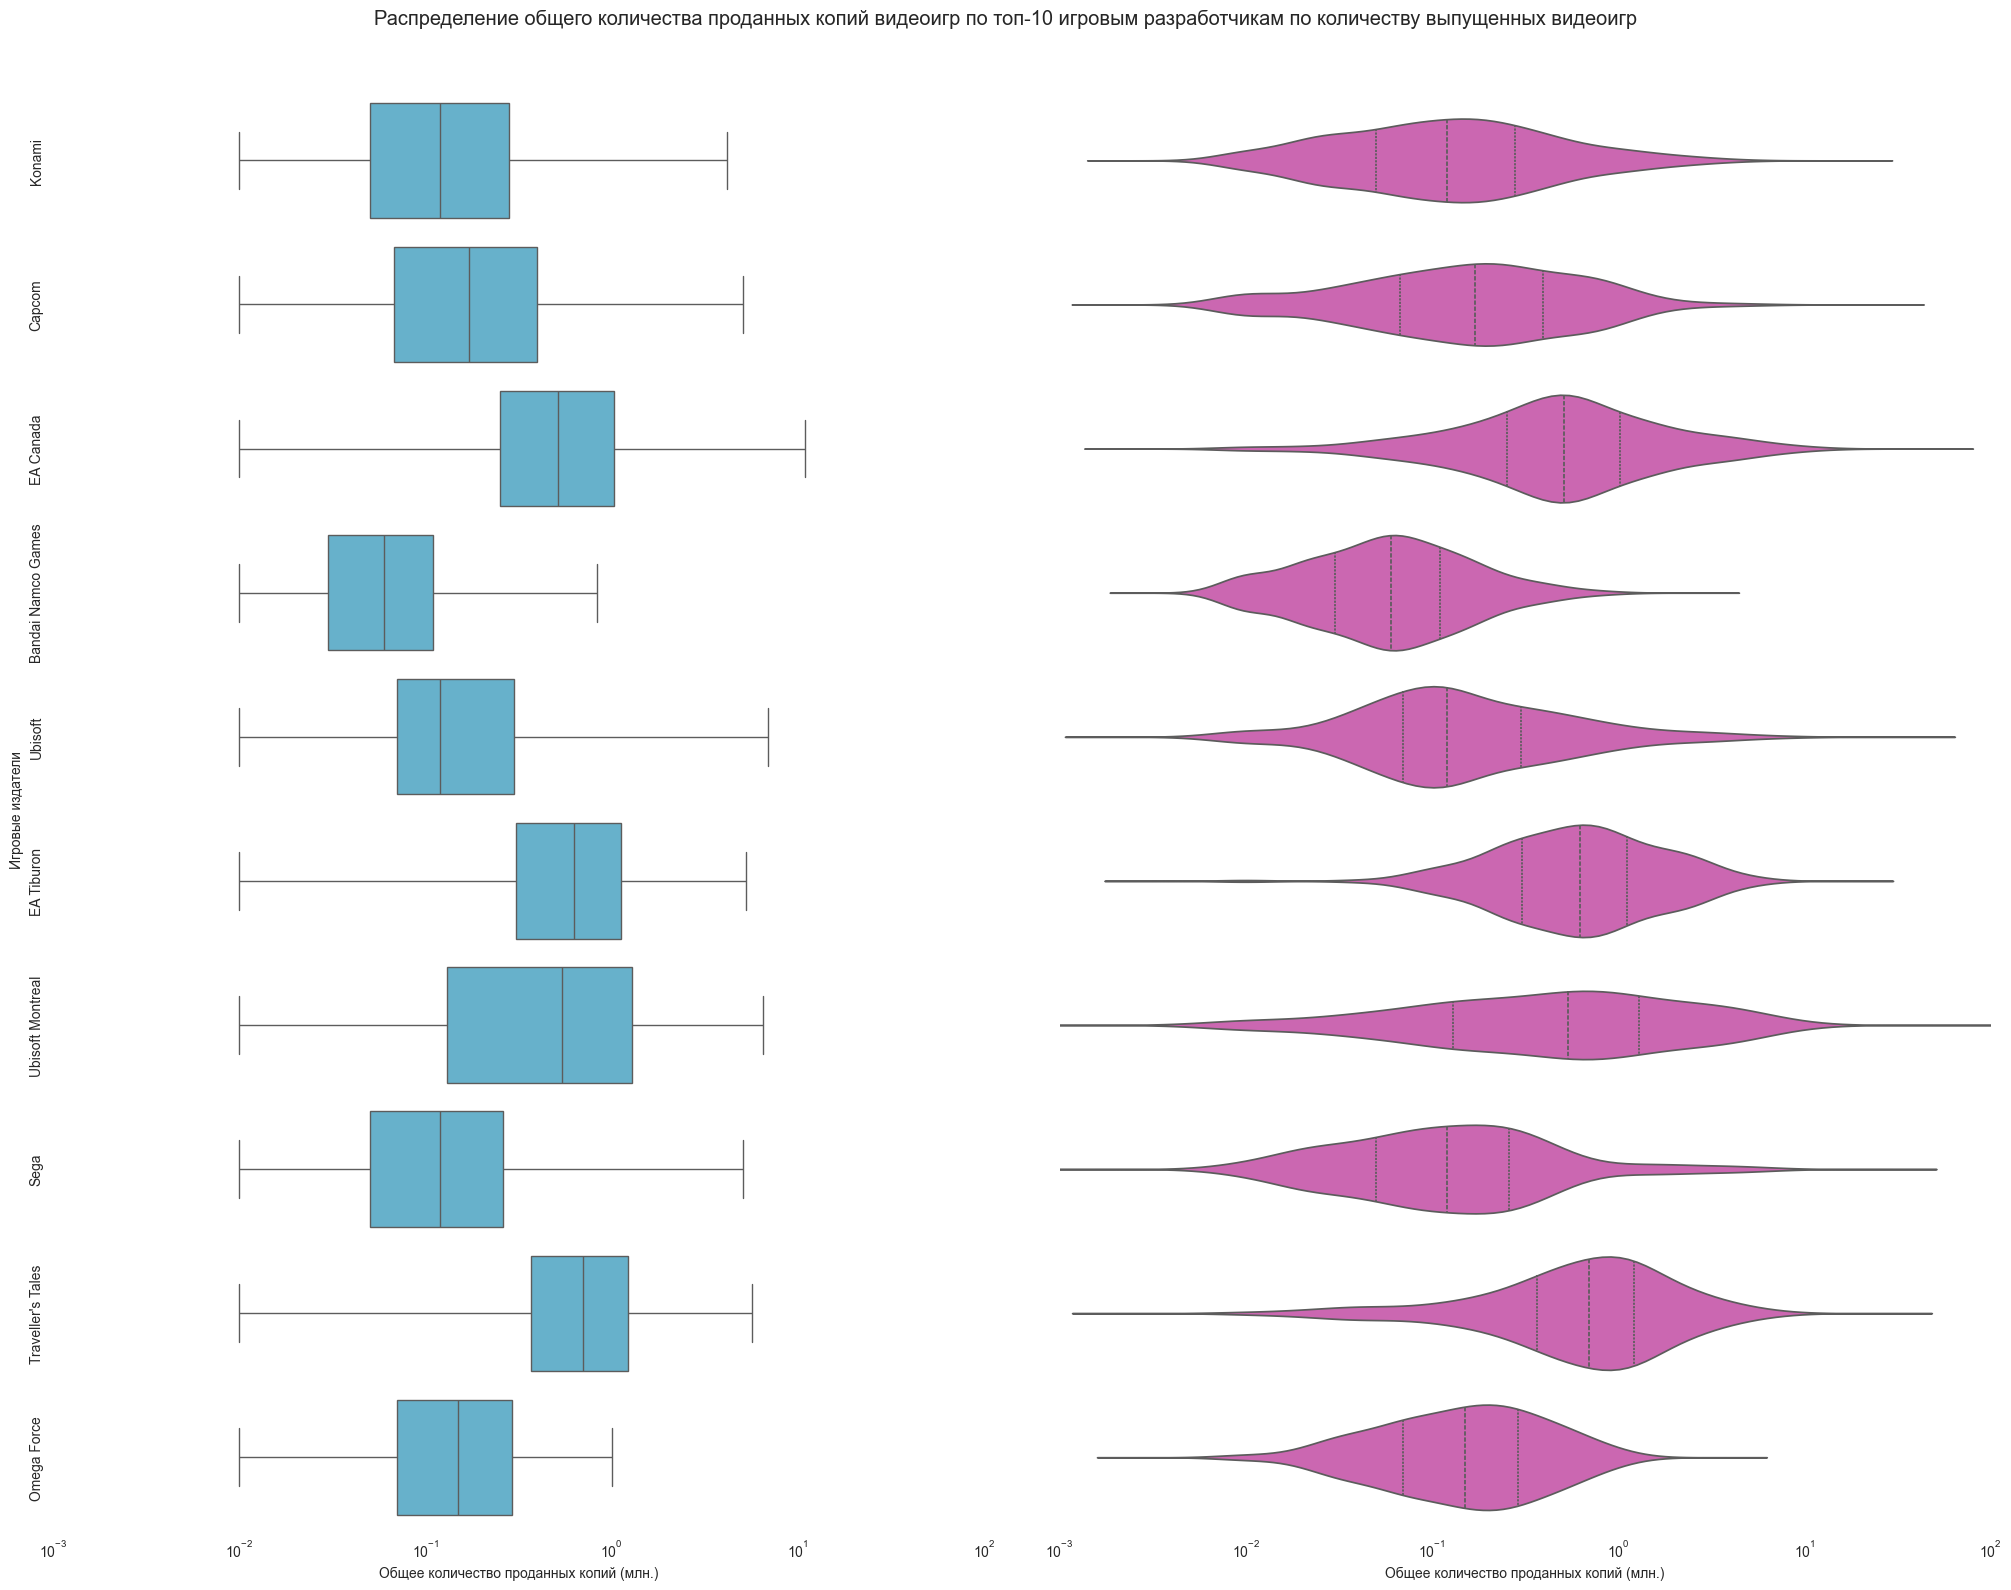

In [42]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 15)
)

figure.suptitle(
    t=('Распределение общего количества проданных копий видеоигр '
       'по топ-10 игровым разработчикам по количеству выпущенных видеоигр'), 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=1, 
    ncols=2, 
    wspace=0.05
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

developers = (df
              .loc[df['total'].notna(), 'developer']
              .value_counts()
              .iloc[:10])
columns = ['total', 'developer']
plot_data = (df
             .loc[(df['developer'].isin(developers.index)) & (df['total'].notna()) & (df['total'] > 0), columns]
             .reset_index(drop=True)
             .sort_values(
                 by='developer',
                 key=lambda x: developers.rank()[x], 
                 ascending=False
                 )) 
sns.boxplot(
    data=plot_data,
    x='total',
    y='developer',
    log_scale=True,
    whis=(0, 100),
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

sns.violinplot(
    data=plot_data,
    x='total',
    y='developer',
    inner="quart",
    log_scale=True,
    bw_adjust=1.0,
    cut=5.0,
    ax=figure.axes[1],
    color=sns.color_palette('hls', 15)[13]
)

for i in range(2):
    figure.axes[i].set_xlabel('Общее количество проданных копий (млн.)')
    figure.axes[i].set_ylabel('Игровые издатели' if not i else '')
    figure.axes[i].set_xbound((10 ** -3, 10 ** 2))
    figure.axes[i].set_xticks([10 ** x for x in range(-3, 3)])
    for s in 'top', 'right', 'bottom', 'left':
        figure.axes[i].spines[s].set_visible(False)

figure.axes[0].set_yticks(
    ticks=np.arange(10), 
    labels=developers.index.map(str),
    rotation=90,
    verticalalignment='center'
)
figure.axes[1].set_yticklabels([]);

На диаграммах видно, что общее количество проданных копий видеоигр среди топ-10 **игровых разработчиков** по количеству выпущенных видеоигр распределено **неравномерно**.

## Анализ категориальных данных 

Посмотрим на описательную статистику категориальных данных.

In [43]:
df.select_dtypes(['object']).describe()

,name,platform,publisher,developer
count,62380,62380,53597,57929
unique,39400,79,3351,8806
top,Plants vs. Zombies,PC,Sega,Konami
freq,17,12582,2150,961


Всего в данных имеется: 
- более **75** игровых платформ;
- более **3350** издателей;
- более **20** разработчиков видеоигр.

### Анализ игровых платформ

Посмотрим на топ-15 игровых платформ по количеству выпущенных видеоигр.

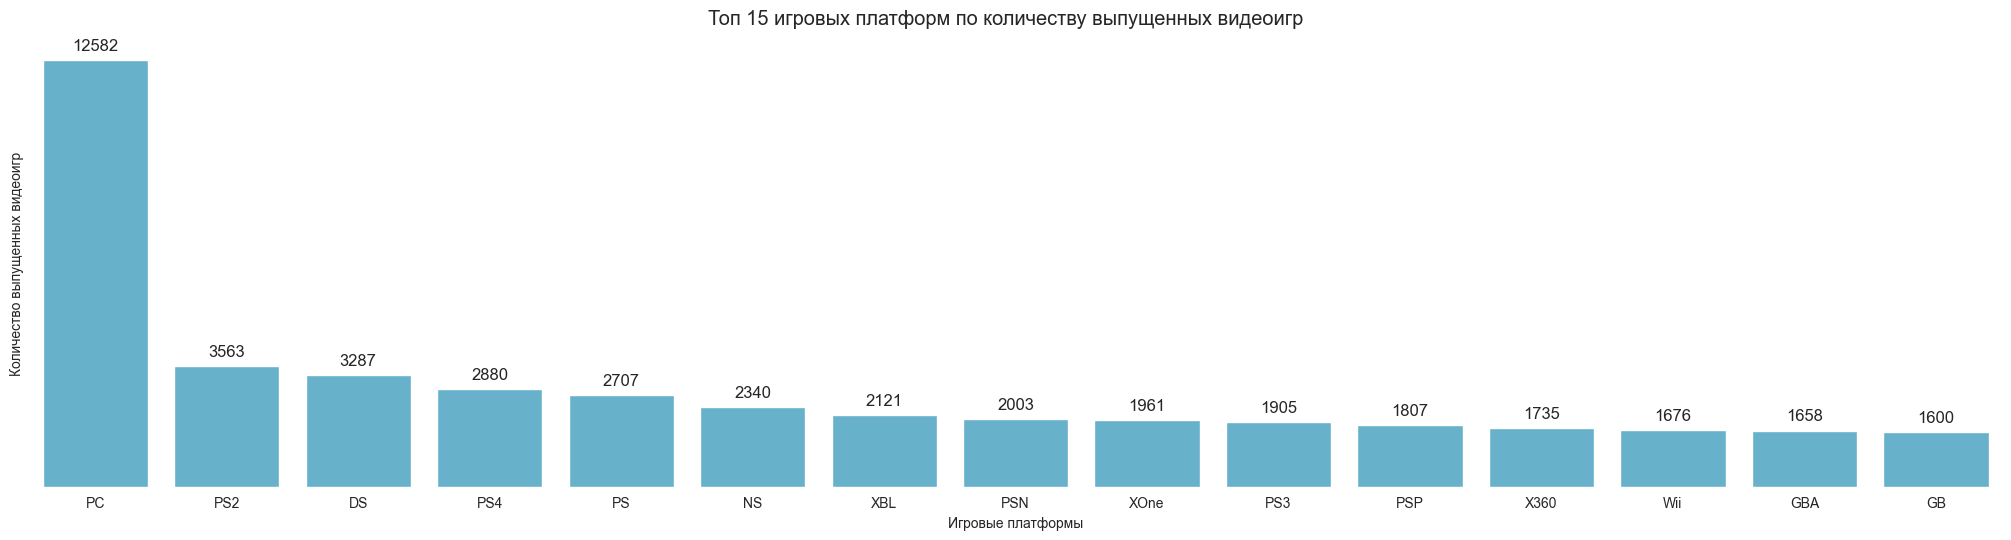

In [44]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых платформ по количеству выпущенных видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df
             .loc[:, 'platform']
             .value_counts()
             .iloc[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые платформы')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
);

**Наибольшее** количество видеоигр выпущено для платформы **Windows PC**, более **12 тыс.** видеоигр. Следующими по количеству выпущенных видеоигр являются **PS2** и **DS**, для них было вупущенно более **3500 тыс.** и более **3200 тыс.** видеоигр соответственно.

Посмотрим на распределение общего количества проданных копий видеоигр среди топ-15 игровых платформ.

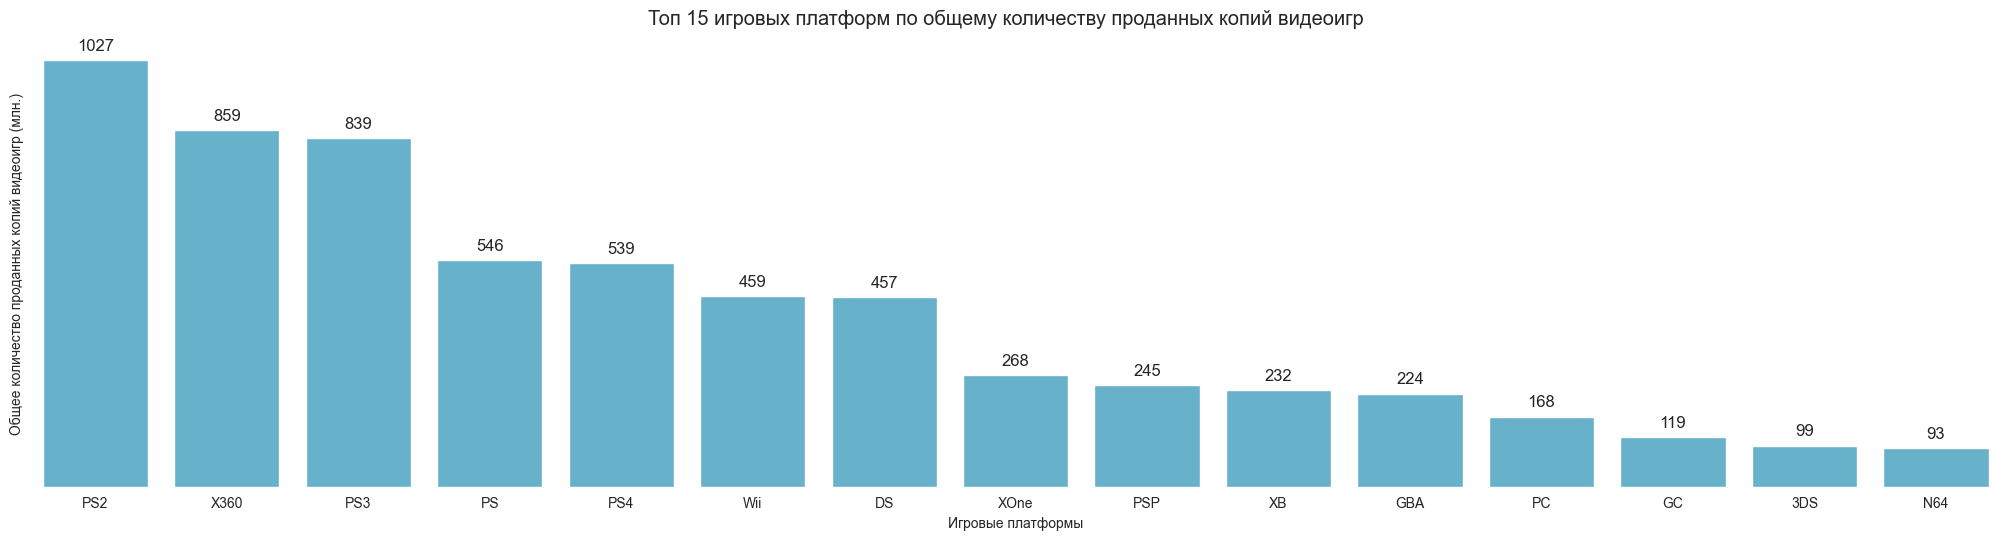

In [45]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых платформ по общему количеству проданных копий видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df[['platform', 'total']]
             .groupby('platform')
             .sum()
             .sort_values(by='total', ascending=False)
             .iloc[:15, :]['total'])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые платформы')
figure.axes[0].set_ylabel('Общее количество проданных копий видеоигр (млн.)')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
);

**Наибольшее** количество проданных копий видеоигр блыо продано для платформы **PS2**, более **1 млрд.** видеоигр. Следующими по количеству проданных копий являются **X360** и **PS3**, для них было продано более **850 млн.** и более **830 млн.** копий соответственно.

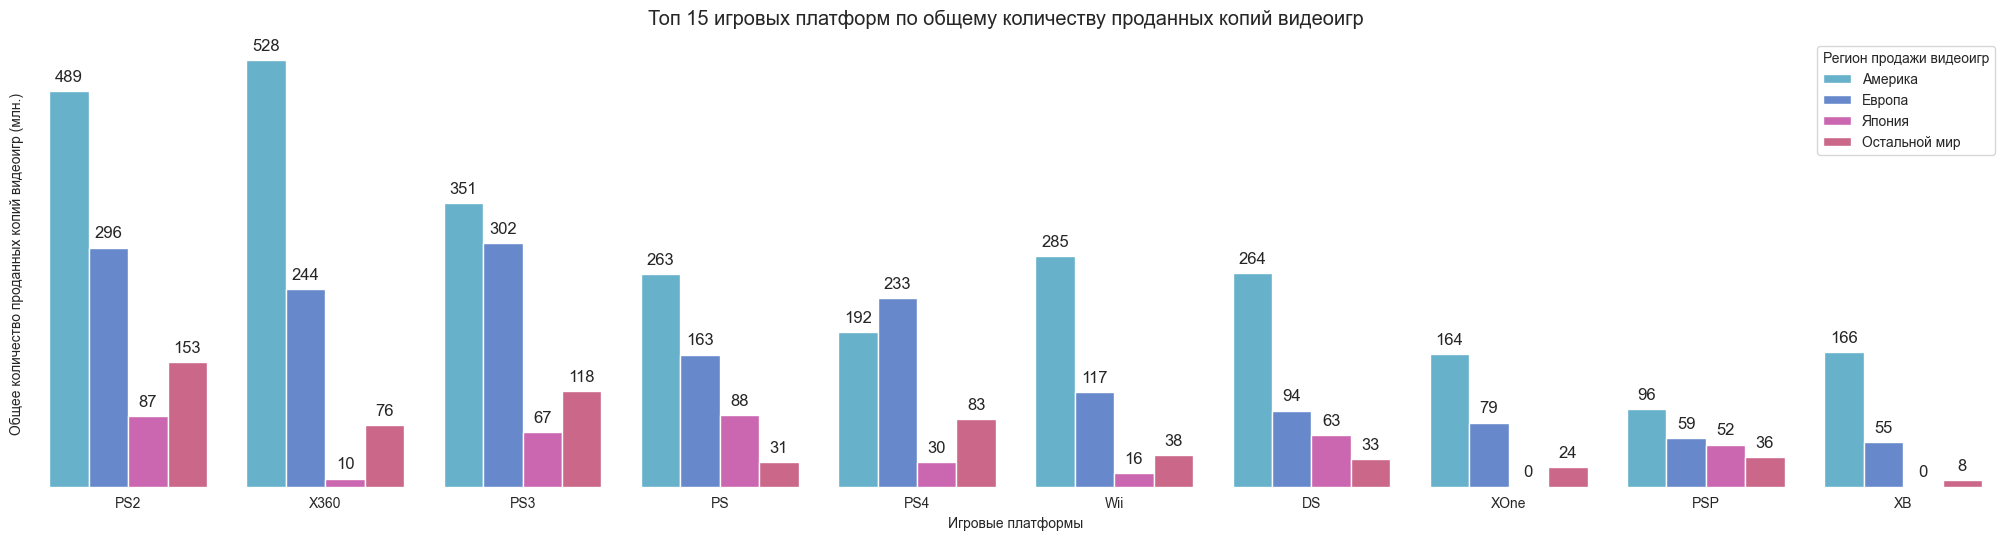

In [46]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых платформ по общему количеству проданных копий видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

platforms = (df[['platform', 'total']]
             .groupby('platform')
             .sum()
             .sort_values(by='total', ascending=False)
             .iloc[:10, :]['total'])

plot_data = (df[['platform', 'america', 'europe', 'japan', 'other']]
             .rename(columns={
                 'america': 'Америка', 
                 'europe': 'Европа', 
                 'japan': 'Япония', 
                 'other': 'Остальной мир'
             })
             .groupby('platform')
             .sum()
             .stack()
             .loc[platforms.index]
             .reset_index()
             .rename(
                 columns={'level_1': 'country', 0: 'value'}
             )
            )

sns.barplot(
    data=plot_data,
    x='platform',
    y='value',
    hue='country',
    ax=figure.axes[0],
    palette=(sns.color_palette('hls', 15)[8:10] + 
             sns.color_palette('hls', 15)[13:15])
)

figure.axes[0].set_xlabel('Игровые платформы')
figure.axes[0].set_ylabel('Общее количество проданных копий видеоигр (млн.)')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
for i in range(4):
    figure.axes[0].bar_label(
        container=figure.axes[0].containers[i],
        fmt='%d',
        fontsize=12, 
        padding=5
    )
figure.axes[0].legend(
    title='Регион продажи видеоигр', 
    loc='upper right', 
    alignment='left'
);

Если рассматривать количество проданных копий видеоигр по регионам, то наибольшее количесвто копий было продано в **Америке** для **всех топ-10 платформ**, за исключением платформы **PS4**, для нее наибольшее количество проданных копий было в **Европе**.

### Анализ игровых издатлей

Посмотрим на топ-15 игровых издатлей по количеству выпущенных видеоигр.

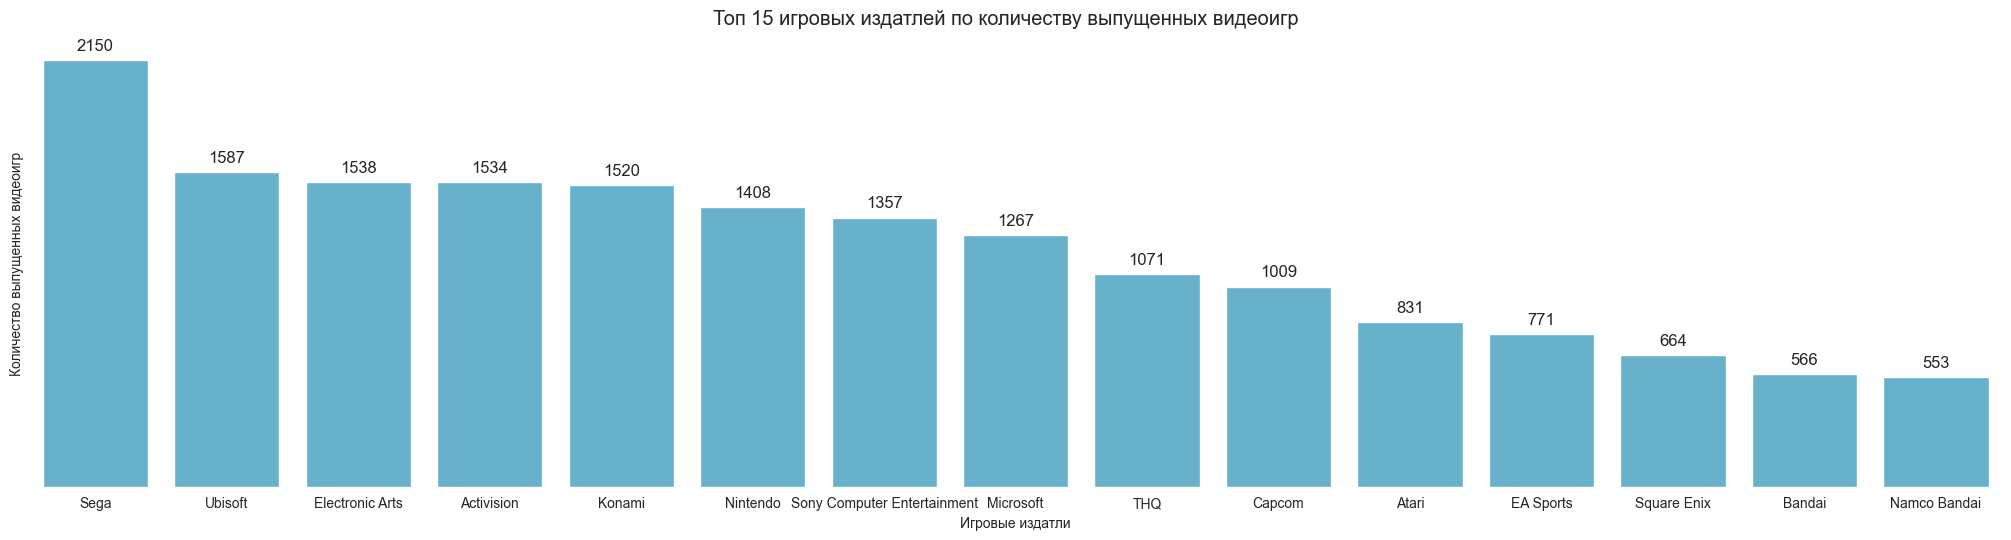

In [47]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых издатлей по количеству выпущенных видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df
             .loc[:, 'publisher']
             .value_counts()
             .iloc[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые издатли')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
);

**Наибольшее** количество видеоигр выпущено издателем **Sega**, более **2.1 тыс.** видеоигр. Следующими по количеству выпущенных видеоигр являются **Ubisoft**, **Electronic Arts**, **Activision** и **Konami**, для них было вупущенно более **1.5 тыс.** видеоигр.

Посмотрим на распределение общего количества проданных копий видеоигр среди топ-15 игровых платформ.

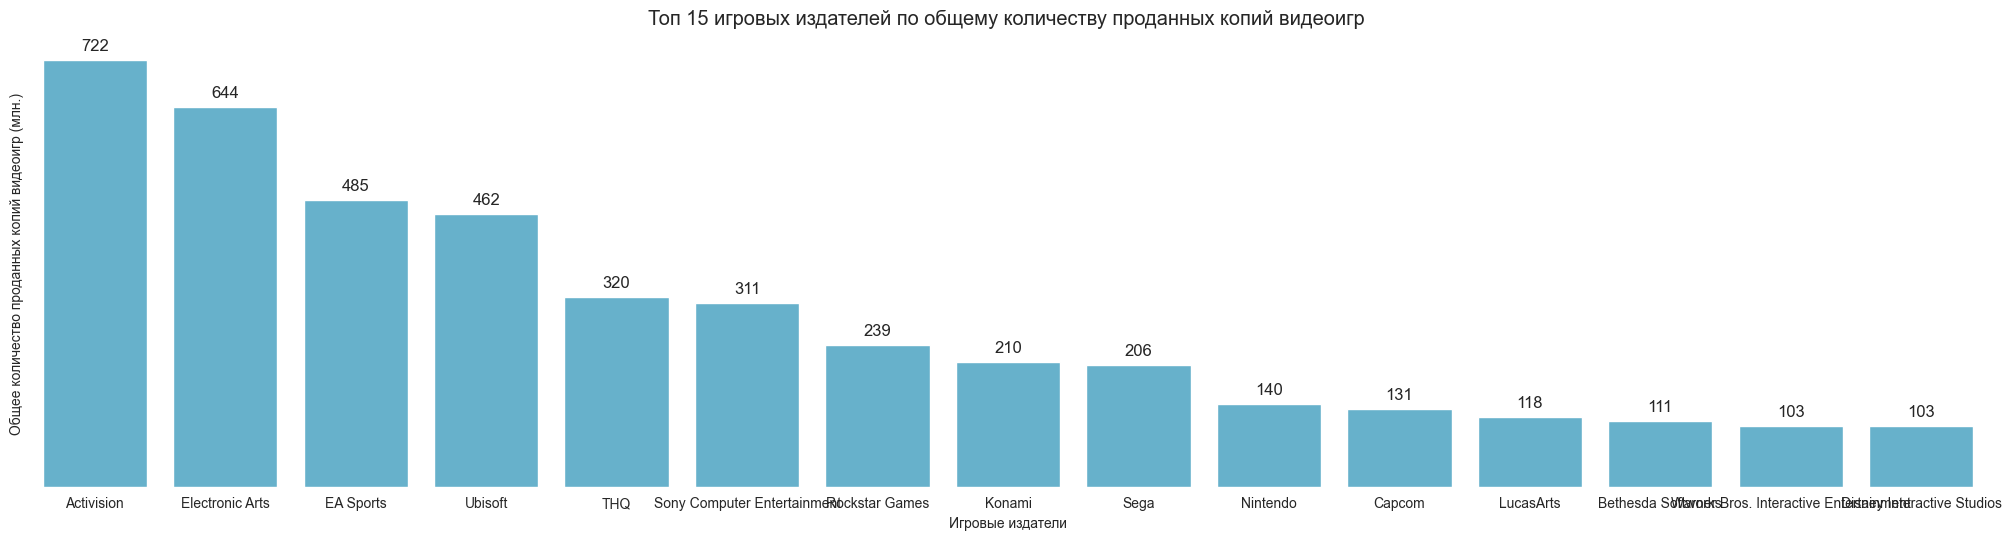

In [48]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых издателей по общему количеству проданных копий видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df[['publisher', 'total']]
             .groupby('publisher')
             .sum()
             .sort_values(by='total', ascending=False)
             .iloc[:15, :]['total'])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые издатели')
figure.axes[0].set_ylabel('Общее количество проданных копий видеоигр (млн.)')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
);

**Наибольшее** количество проданных копий видеоигр было продано под издательством **Activision**, более **720 млн.** копий. Следующим по количеству проданных копий является **Electronic Arts** - более **644 млн.** копий.

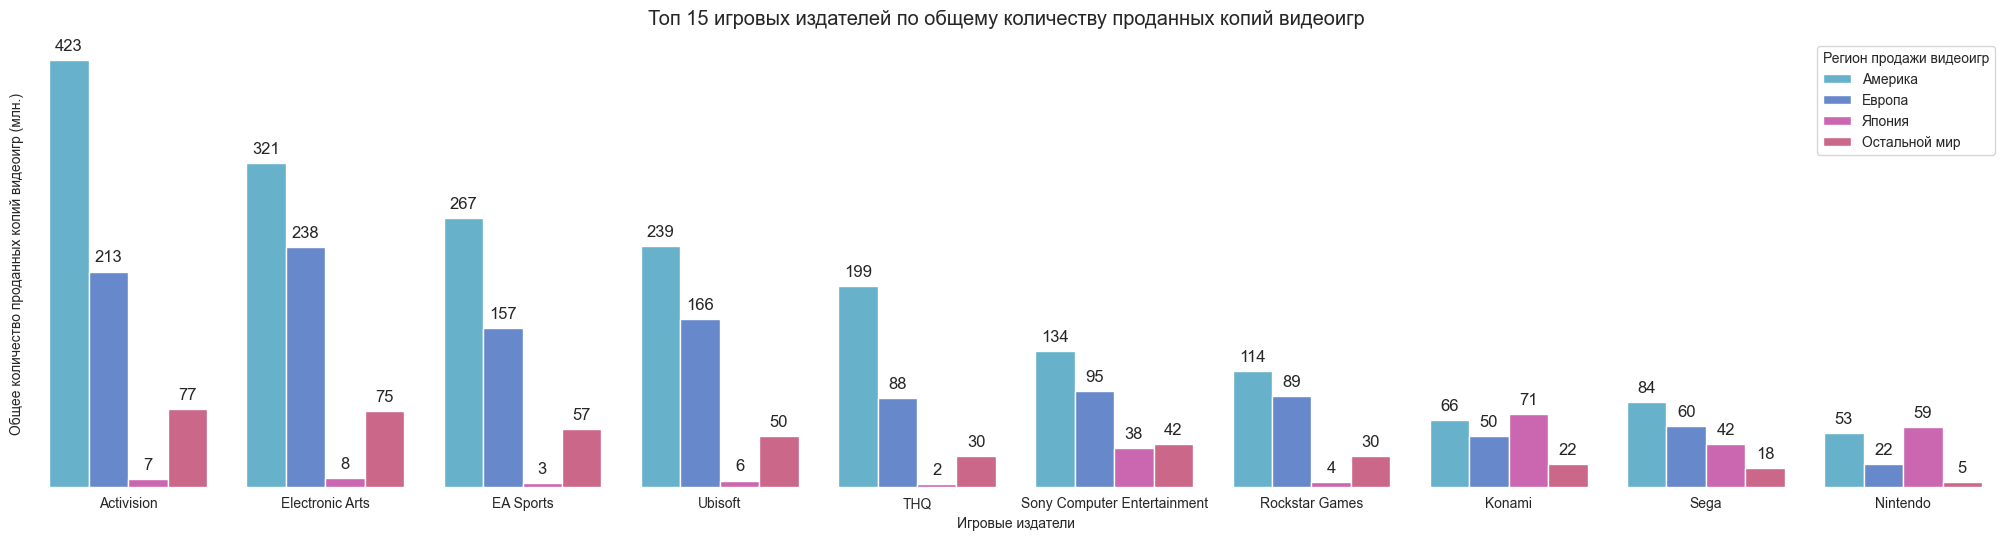

In [49]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых издателей по общему количеству проданных копий видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

platforms = (df[['publisher', 'total']]
             .groupby('publisher')
             .sum()
             .sort_values(by='total', ascending=False)
             .iloc[:10, :]['total'])

plot_data = (df[['publisher', 'america', 'europe', 'japan', 'other']]
             .rename(columns={
                 'america': 'Америка', 
                 'europe': 'Европа', 
                 'japan': 'Япония', 
                 'other': 'Остальной мир'
             })
             .groupby('publisher')
             .sum()
             .stack()
             .loc[platforms.index]
             .reset_index()
             .rename(
                 columns={'level_1': 'country', 0: 'value'}
             )
            )

sns.barplot(
    data=plot_data,
    x='publisher',
    y='value',
    hue='country',
    ax=figure.axes[0],
    palette=(sns.color_palette('hls', 15)[8:10] + 
             sns.color_palette('hls', 15)[13:15])
)

figure.axes[0].set_xlabel('Игровые издатели')
figure.axes[0].set_ylabel('Общее количество проданных копий видеоигр (млн.)')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
for i in range(4):
    figure.axes[0].bar_label(
        container=figure.axes[0].containers[i],
        fmt='%d',
        fontsize=12, 
        padding=5
    )
figure.axes[0].legend(
    title='Регион продажи видеоигр', 
    loc='upper right', 
    alignment='left'
);

Если рассматривать количество проданных копий видеоигр по регионам, то наибольшее количесвто копий было продано в **Америке** для **всех топ-10 издателей**.

### Анализ игровых разработиков

Посмотрим на топ-15 игровых издатлей по количеству выпущенных видеоигр.

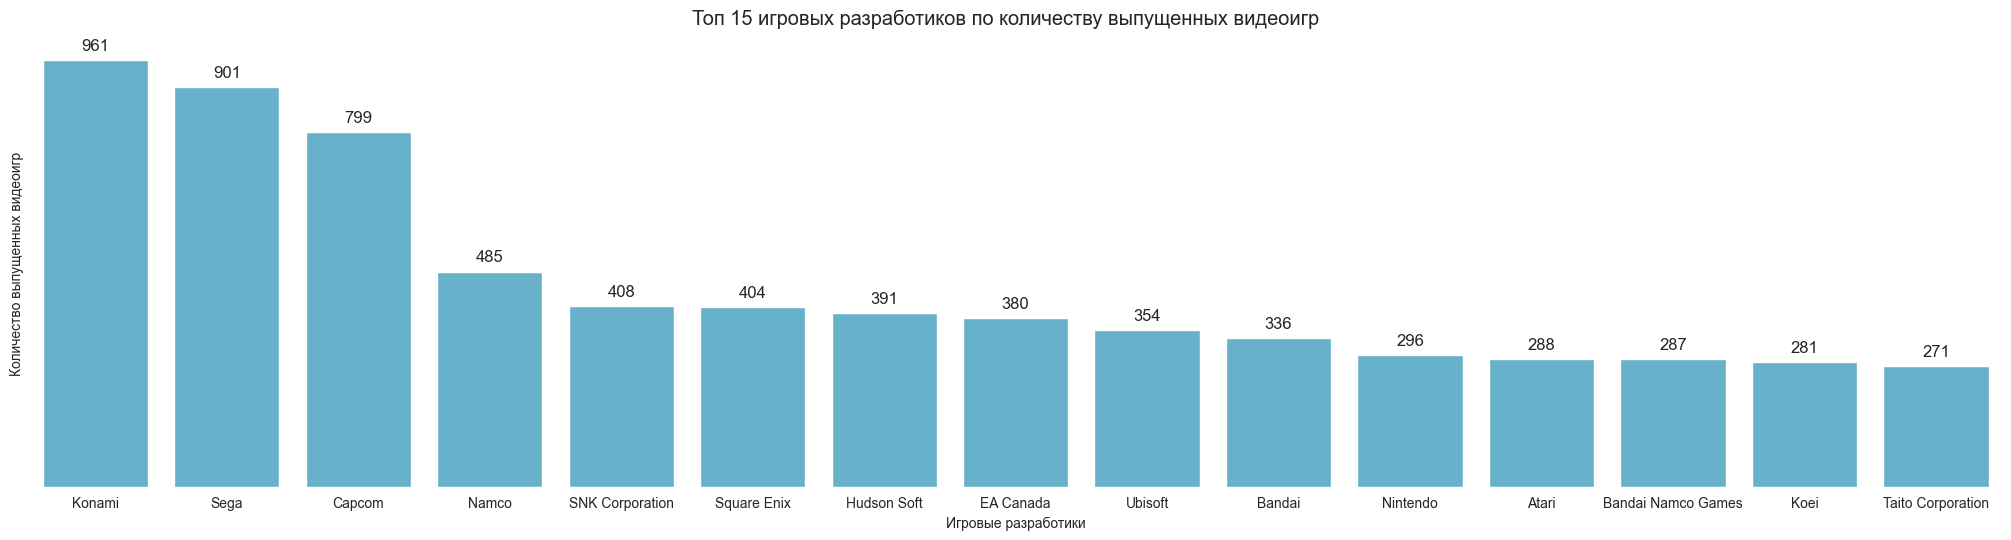

In [50]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых разработиков по количеству выпущенных видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df
             .loc[:, 'developer']
             .value_counts()
             .iloc[:15])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые разработики')
figure.axes[0].set_ylabel('Количество выпущенных видеоигр')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0], 
    fontsize=12, 
    padding=5
);

**Наибольшее** количество видеоигр выпущено разработчика **Konami**, более **950** видеоигр. Следующим разраюотчиком по количеству выпущенных видеоигр является **Sega** - более **900** видеоигр.

Посмотрим на распределение общего количества проданных копий видеоигр среди топ-15 игровых платформ.

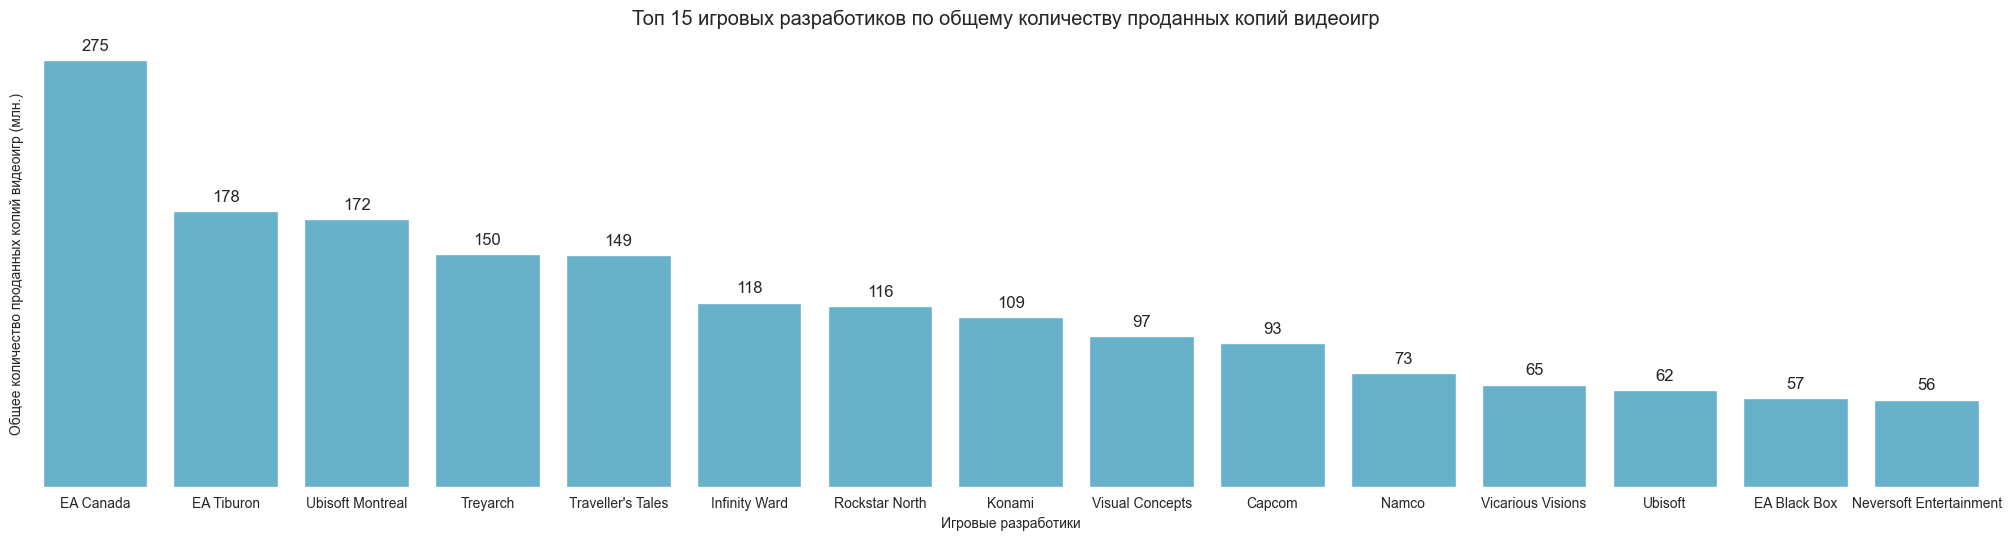

In [51]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых разработиков по общему количеству проданных копий видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (df[['developer', 'total']]
             .groupby('developer')
             .sum()
             .sort_values(by='total', ascending=False)
             .iloc[:15, :]['total'])

sns.barplot(
    data=plot_data,
    ax=figure.axes[0],
    color=sns.color_palette('hls', 15)[8]
)

figure.axes[0].set_xlabel('Игровые разработики')
figure.axes[0].set_ylabel('Общее количество проданных копий видеоигр (млн.)')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
figure.axes[0].bar_label(
    container=figure.axes[0].containers[0],
    fmt='%d',
    fontsize=12, 
    padding=5
);

**Наибольшее** количество проданных копий видеоигр было продано у разработчика **EA Canada**, более **270 млн.** копий. Следующими по количеству проданных копий являются **EA Tiburon** - более **170 млн.** копий.

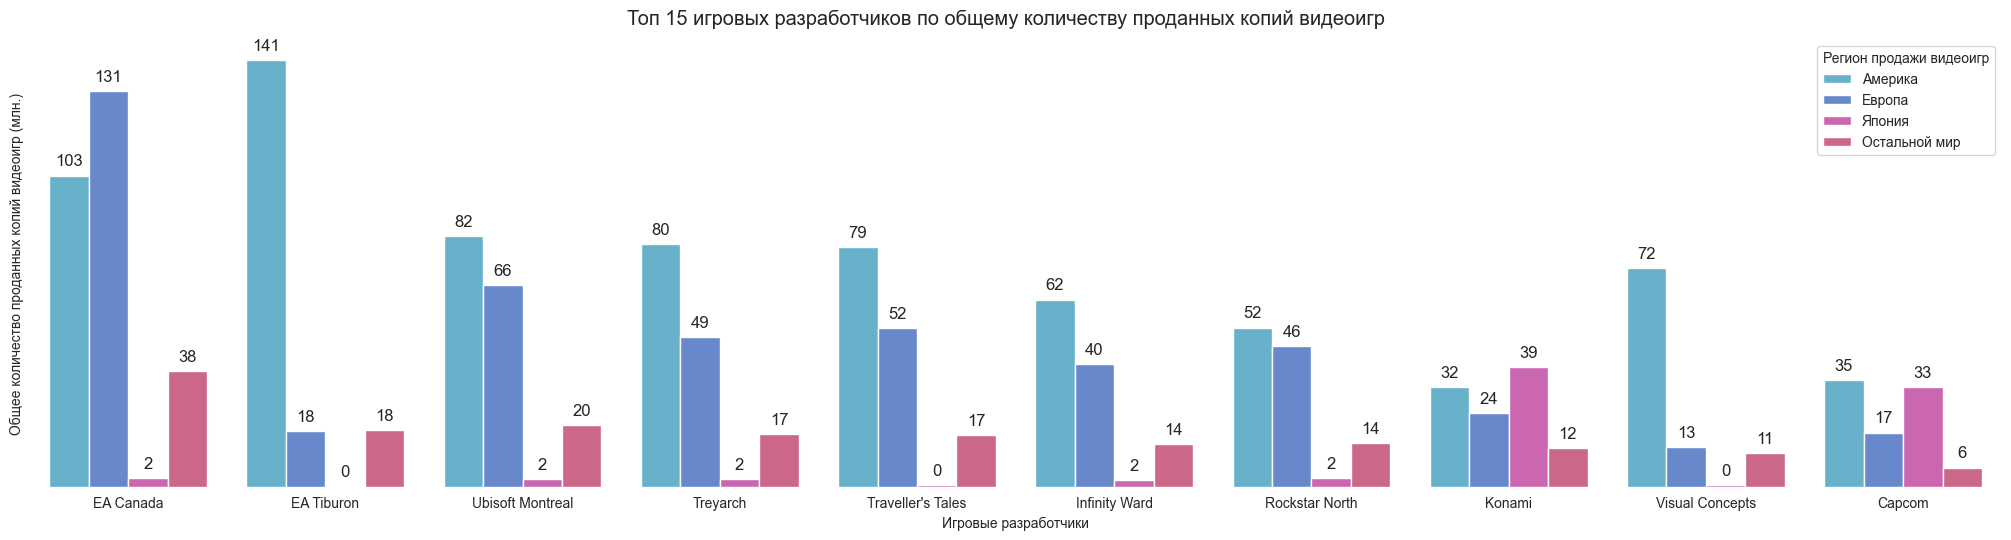

In [52]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Топ 15 игровых разработчиков по общему количеству проданных копий видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

figure.add_subplot()

platforms = (df[['developer', 'total']]
             .groupby('developer')
             .sum()
             .sort_values(by='total', ascending=False)
             .iloc[:10, :]['total'])

plot_data = (df[['developer', 'america', 'europe', 'japan', 'other']]
             .rename(columns={
                 'america': 'Америка', 
                 'europe': 'Европа', 
                 'japan': 'Япония', 
                 'other': 'Остальной мир'
             })
             .groupby('developer')
             .sum()
             .stack()
             .loc[platforms.index]
             .reset_index()
             .rename(
                 columns={'level_1': 'country', 0: 'value'}
             )
            )

sns.barplot(
    data=plot_data,
    x='developer',
    y='value',
    hue='country',
    ax=figure.axes[0],
    palette=(sns.color_palette('hls', 15)[8:10] + 
             sns.color_palette('hls', 15)[13:15])
)

figure.axes[0].set_xlabel('Игровые разработчики')
figure.axes[0].set_ylabel('Общее количество проданных копий видеоигр (млн.)')
figure.axes[0].set_yticks([])
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)
for i in range(4):
    figure.axes[0].bar_label(
        container=figure.axes[0].containers[i],
        fmt='%d',
        fontsize=12, 
        padding=5
    )
figure.axes[0].legend(
    title='Регион продажи видеоигр', 
    loc='upper right', 
    alignment='left'
);

Если рассматривать количество проданных копий видеоигр по регионам, то наибольшее количесвто копий было продано в **Америке** для **всех топ-10 разработчиков**, за исключением разработчика **EA Canada**, для него наибольшее количество проданных копий было в **Европе**.

# Выводы
***

**Выводы по предварительной обработке данных**:
1. Названия полей оставлены **без изменений**.
2. Удалено до **20** (**0.1%**) явных дубликатов.
3. Измены типы данных:
    - для поля **date** изменен тип данных на **datetime**;
    - для **числовых полей**, уменьшена точность до **32 бит**.
4. Удалено до **2000** (**3.0%**) записей, в которых в поле **platform** имеются значения **All** или **Series**.
5. Пустые записи **не удалялись**. В полях **publisher** и **developer** до **13000** (**20.0%**) значений **Unknown** заменены на **NaN**.
6. Явные дубликаты до **100** (**0.1%**) **не удалялись**.

**Выводы по разведочному анализу данных**:
1. Дата выпуска видеоигр:
    - самая **первая видеоигра** была выпущена в **1970** году. **Резкий подъем** количества выпущенных видеоигр начинается в **1989** году и достигает свого **пика** в **2009** году (приблизительно **4300** видеоигр);
    - наибольшее количество видеоигр было выпущено в **январе**, **1** числа;
    - **резкий подъем** количества продаж видеоигр начинается в **1994** году и достигает свого **пика** в **2009** году (приблизительно **1700** видеоигр);
    - если рассматривать продажи видеоигр **по регионам** отдельно, то закономерность остается прежней, за исключением того, резкий подъем количества продаж в **Японии** начался в **2005** году, а для **остальных регионов** резкий пдъем аналогичен общему тренду - **1994** год. В **2009** году **Америка** и **Европа** достигли примерно одинакого количества продаж - **1000** видеоигр. В **Японии** продажи достигли приблизительно **500** видеоигр, а в остальном мире - около **1400** видеоигр;
    - графи количества проданных копий видеоигр **аналогичен** графику количеста продаж. **Резкий подъем** количества проданных копий видеоигр начинается в **1994** году и достигает свого **пика** в **2008** году (приблизительно **550 млн.** копий видеоигр);
    - если рассматривать продажи видеоигр **по регионам** отдельно, то закономерность остается прежней, за исключением того, резкий подъем количества проданных копий видеоигр в **Японии** и **остальных регионах** отсутствует. В **2008** году **Америка** и **Европа** достигли приблизительно **280 млн.** и **160 млн.** проданных копий видеоигр соответственно. **Япония** и **остальные регионы** приблизительно **60 млн.** и **25 млн.** соответственно.
2. Анализ числовых данных:
    - Более **90%** видеоигр имеют:
        - **количество оданных копий** - менее  **3.9 млн.**;
        - **общее количество** проданных копий - менее **0.8 млн.**;
        - количество проданных копий в **Америке** - менее **0.6 млн.**;
        - количество проданных копий в **Европе** - менее **0.35 млн.**;
        - количество проданных копий в **Японии** - менее **0.25 млн.**;
        - количество проданных копий в **остальных регионах** - менее **0.1 млн.**;
        - рейтинг сайта VGC - **8.8**;
        - рейтинг критиков - **8.9**;
        - рейтинг пользователей- **8.6**.
    - наибольшей зависимостью обладают (коэфициент корреляции Пирсона - более 0.85) - **общее** количество проданных копий и количество проданных копий в **Америке**, **общее** количество проданных копий и количество проданных копий в **Европе**, **общее** количество проданных копий и количество проданных копий в **отсальном мире**.
    1. Анализ общего количества продаж видеоигр:
        - **наибольшая зависимость** общего количества проданных копий видеоигр наблюдается от количества проданных копий в **Америке** (коэффициент корреляции Пиросна **более 0.90**), количества проданных копий в **Европе** (коэффициент корреляции Пиросна **более 0.90**) и количества проданных копий в **остальных регионах** (коэффициент корреляции Пиросна **более 0.85**). **Наименьшая зависимость** наблюдается от от количества проданных копий в **Японии** (коэффициент корреляции Пиросна **менее 0.25**);
        - на диаграммах видно, что общее количество проданных копий видеоигр среди топ-10 **игровых платформ** по количеству выпущенных видеоигр распределено **неравномерно**;
        - на диаграммах видно, что общее количество проданных копий видеоигр среди топ-10 **игровых издаелей** по количеству выпущенных видеоигр распределено **неравномерно**;
        - на диаграммах видно, что общее количество проданных копий видеоигр среди топ-10 **игровых разработчиков** по количеству выпущенных видеоигр распределено **неравномерно**;
3. Анализ категориальных данных:
    - Всего в данных имеется: 
        - более **75** игровых платформ;
        - более **3350** издателей;
        - более **20** разработчиков видеоигр.
    1. Анализ игровых платформ:
        - **наибольшее** количество видеоигр выпущено для платформы **Windows PC**, более **12 тыс.** видеоигр. Следующими по количеству выпущенных видеоигр являются **PS2** и **DS**, для них было вупущенно более **3500 тыс.** и более **3200 тыс.** видеоигр соответственно;
        - **наибольшее** количество проданных копий видеоигр блыо продано для платформы **PS2**, более **1 млрд.** копий. Следующими по количеству проданных копий являются **X360** и **PS3**, для них было продано более **850 млн.** и более **830 млн.** копий соответственно;
        - если рассматривать количество проданных копий видеоигр по регионам, то наибольшее количесвто копий было продано в **Америке** для **всех топ-10 платформ**, за исключением платформы **PS4**, для нее наибольшее количество проданных копий было в **Европе**.
    2. Анализ игровых издатлей:
        - **наибольшее** количество видеоигр выпущено издателем **Sega**, более **2.1 тыс.** видеоигр. Следующими по количеству выпущенных видеоигр являются **Ubisoft**, **Electronic Arts**, **Activision** и **Konami**, для них было вупущенно более **1.5 тыс.** видеоигр;
        - **наибольшее** количество проданных копий видеоигр было продано под издательством **Activision**, более **720 млн.** копий. Следующим по количеству проданных копий является **Electronic Arts** - более **644 млн.** копий;
        - Если рассматривать количество проданных копий видеоигр по регионам, то наибольшее количесвто копий было продано в **Америке** для **всех топ-10 издателей**.
    3. Анализ игровых разработчиков:
        - **наибольшее** количество видеоигр выпущено разработчика **Konami**, более **950** видеоигр. Следующим разраюотчиком по количеству выпущенных видеоигр является **Sega** - более **900** видеоигр;
        - **наибольшее** количество проданных копий видеоигр было продано у разработчика **EA Canada**, более **270 млн.** копий. Следующими по количеству проданных копий являются **EA Tiburon** - более **170 млн.** копий;
        - если рассматривать количество проданных копий видеоигр по регионам, то наибольшее количесвто копий было продано в **Америке** для **всех топ-10 разработчиков**, за исключением разработчика **EA Canada**, для него наибольшее количество проданных копий было в **Европе**.